# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Feature engineering
4. Modelling

---

## 1. Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt


#for displaying image 
from IPython.display import Image

#for numerical data transformation 
from scipy.stats import kstest, norm , anderson, gaussian_kde, boxcox, kurtosis, skew
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

**Note**: reference date is Jan 2016

In [3]:
df = pd.read_csv('/Users/hoangtran/Desktop/BCG_test/BCG-DS-virtual-internship/Taks3_FeatureEngineering/clean_data_after_eda.csv')
df['date_activ'] = pd.to_datetime(df['date_activ'], format='%Y-%m-%d')
df['date_end'] = pd.to_datetime(df['date_end'], format='%Y-%m-%d')
df['date_modif_prod'] = pd.to_datetime(df['date_modif_prod'], format='%Y-%m-%d')
df['date_renewal'] = pd.to_datetime(df['date_renewal'], format='%Y-%m-%d')

In [4]:
df.head(3)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   

   var_6m_price_off_peak_var  var_6m_price_peak_var  \
0                   0.000131           4.100838e-05   
1                   0.000003           1.217891e-03   
2                   0.000004           9.450150e-08   

   var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
0                   0.000908                   2.086294   
1                   0.000000                   0.009482   
2                   0.000000                   0.000000   

   var_6m_price_peak_fix  var_6m_price_mid_peak_fix var_6m_price_off_peak  \
0              99.530517                  44.235794              2.086425   
1               0.000000                   0.000000              0.009485   
2               0.000000                   0.000000              0.000004   

   var_6m_price_peak  var_6m_price_mid_peak  churn  
0       9.953056e+01              44.236702      1  
1       1.217891e-03               0.000000      0  
2       9.450150e-08               0.000000      0  

[3 rows x 44 columns]

In [5]:
# df.columns.to_list()

#### General Info
- df.index.nunique() # 14606
- df.shape # **(14606, 44)**
- df.info() 

|#|Column| Non-Null Count|Dtype|       
|--- | ------         |                 --------------|-----|       
 |0| **id**        |                      14606 |non-null|  object|        
 |1  | channel_sales                   |14606| non-null|  object        |
 |2   |cons_12m                        |14606| non-null|  int64         |
 |3   |cons_gas_12m                    |14606| non-null|  int64         |
 |4   |cons_last_month                 |14606| non-null|  int64         |
 |5   |date_activ                      |14606| non-null|  datetime64[ns]|
 |6   |date_end                        |14606| non-null|  datetime64[ns]|
 |7   |date_modif_prod                 |14606| non-null|  datetime64[ns]|
 |8   |date_renewal                    |14606| non-null|  datetime64[ns]|
 |9   |forecast_cons_12m               |14606| non-null|  float64       |
 |10  |forecast_cons_year              |14606| non-null|  int64         |
 |11  |forecast_discount_energy        |14606| non-null|  float64       |
 |12  |forecast_meter_rent_12m         |14606| non-null|  float64       |
 |13  |forecast_price_energy_off_peak  |14606| non-null|  float64       |
 |14  |forecast_price_energy_peak      |14606| non-null|  float64       |
 |15  |forecast_price_pow_off_peak     |14606| non-null|  float64       |
 |16  |has_gas                         |14606| non-null|  object        |
 |17  |imp_cons                        |14606| non-null|  float64       |
 |18  |margin_gross_pow_ele            |14606| non-null|  float64       |
 |19  |nb_prod_act                     |14606| non-null|  int64         |
 |20  |net_margin                      |14606| non-null|  float64       |
 |21  |num_years_antig                 |14606| non-null|  int64         |
 |22  |origin_up                       |14606| non-null|  object        |
 |23  |pow_max                         |14606| non-null|  float64       |
 |24  |var_year_price_off_peak_var     |14606| non-null|  float64       |
 |25  |var_year_price_peak_var         |14606| non-null|  float64       |
 |26  |var_year_price_peak_fix         |14606| non-null|  float64       |
 |27  |var_6m_price_peak_var           |14606| non-null|  float64       |
 |28  |var_6m_price_off_peak_fix       |14606| non-null|  float64       |
 |29  |***churn***                           |14606| non-null|  int64       |


## 3. Feature engineering of client's dataset


--- 
### Transform data for modeling:
#### a. Categorical type 

In [6]:
df.dtypes.index[df.dtypes == 'object'].to_list()

['id', 'channel_sales', 'has_gas', 'origin_up']

the 3 categorical values that needs to be one-hot encoded are: 'channel_sales', 'has_gas', 'origin_up'

In [7]:
df[['channel_sales', 'has_gas', 'origin_up']] = df[['channel_sales', 'has_gas', 'origin_up']].astype('category')

In [8]:
def dummy_variable_describe(df, col): # the df is the df containing the col to be described
    col =  pd.DataFrame(df[[col]].value_counts())
    col['pct'] = col['count']/col['count'].sum()
    col.sort_values(by='pct', ascending=False, inplace=True)
    col.style.set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '5px')]},
    {'selector': 'td', 'props': [('font-size', '7px')]}]
    )
    return col 

In [9]:
cols = ['channel_sales', 'has_gas', 'origin_up']
for col in cols:
    print(dummy_variable_describe(df, col))

                                  count       pct
channel_sales                                    
foosdfpfkusacimwkcsosbicdxkicaua   6754  0.462413
MISSING                            3725  0.255032
lmkebamcaaclubfxadlmueccxoimlema   1843  0.126181
usilxuppasemubllopkaafesmlibmsdf   1375  0.094139
ewpakwlliwisiwduibdlfmalxowmwpci    893  0.061139
sddiedcslfslkckwlfkdpoeeailfpeds     11  0.000753
epumfxlbckeskwekxbiuasklxalciiuu      3  0.000205
fixdbufsefwooaasfcxdxadsiekoceaa      2  0.000137
         count       pct
has_gas                 
f        11955  0.818499
t         2651  0.181501
                                  count       pct
origin_up                                        
lxidpiddsbxsbosboudacockeimpuepw   7097  0.485896
kamkkxfxxuwbdslkwifmmcsiusiuosws   4294  0.293989
ldkssxwpmemidmecebumciepifcamkci   3148  0.215528
MISSING                              64  0.004382
usapbepcfoloekilkwsdiboslwaxobdp      2  0.000137
ewxeelcelemmiwuafmddpobolfuxioce      1  0.000068


- 'channel_sales'
<!-- <tab> -->
<small>
to avoid the dummy variable trap, and since there are 3 channels with a low pct of the counts (<0.1%), we will drop these 11+3+2 = 16 entries with the 3 channels of the lowest count   
</small>
<!-- </tab> -->

- 'has_gas'

<small>
this is a true or false (typed as object because of the value being 't'/'f' not recognized as bool) of whether a client has gas or does not have gas with PowerCo, hence we will only neet to transform it as 0/1
</small>

- 'origin_up'

<small>
we will handle this categorical variable similarly to the channel_sales variable, we will drop the 2+1 = 3 entries with the 2 origin_up of the lowest count   
</small>



In [10]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel_sales')
df = df.drop(columns=['channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_sales_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa'])
# df.head()

In [11]:
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=['origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
# df.head()

In [12]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
df['has_gas'].value_counts()

has_gas
0    11955
1     2651
Name: count, dtype: int64

In [13]:
list = df.dtypes.index[df.dtypes == 'bool']
list.to_list()
df[list].head()

channel_sales_MISSING  channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                  False                                           False   
1                   True                                           False   
2                  False                                           False   
3                  False                                           False   
4                   True                                           False   

   channel_sales_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                            True   
1                                           False   
2                                            True   
3                                           False   
4                                           False   

   channel_sales_lmkebamcaaclubfxadlmueccxoimlema  \
0                                           False   
1                                           False   
2                                           False   
3                                            True   
4                                           False   

   channel_sales_usilxuppasemubllopkaafesmlibmsdf  origin_up_MISSING  \
0                                           False              False   
1                                           False              False   
2                                           False              False   
3                                           False              False   
4                                           False              False   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                       False   
1                                        True   
2                                        True   
3                                        True   
4                                        True   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                        True  
1                                       False  
2                                       False  
3                                       False  
4                                       False

In [14]:
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  forecast_cons_12m  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23               0.00   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31             189.95   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17              47.96   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31             240.04   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09             445.75   

   forecast_cons_year  ...  churn  channel_sales_MISSING  \
0                   0  ...      1                  False   
1                   0  ...      0                   True   
2                   0  ...      0                  False   
3                   0  ...      0                  False   
4                 526  ...      0                   True   

   channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   

   channel_sales_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                            True   
1                                           False   
2                                            True   
3                                           False   
4                                           False   

   channel_sales_lmkebamcaaclubfxadlmueccxoimlema  \
0                                           False   
1                                           False   
2                                           False   
3                                            True   
4                                           False   

  channel_sales_usilxuppasemubllopkaafesmlibmsdf  origin_up_MISSING  \
0                                          False              False   
1                                          False              False   
2                                          False              False   
3                                          False              False   
4                                          False              False   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                       False   
1                                        True   
2                                        True   
3                                        True   
4                                        True   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                        True  
1                                       False  
2                                       False  
3                                       False  
4                                       False  

[5 rows x 51 columns]

#### b. Numerical type 

In [15]:
int_list = df.dtypes.index[df.dtypes == 'int64'].to_list()
float_list = df.dtypes.index[df.dtypes == 'float64'].to_list()
num_list = int_list + float_list
num_list.remove('churn')

In [16]:
df[num_list].head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_year  nb_prod_act  \
0         0         54946                0                   0            2   
1      4660             0                0                   0            1   
2       544             0                0                   0            1   
3      1584             0                0                   0            1   
4      4425             0              526                 526            1   

   num_years_antig  forecast_cons_12m  forecast_discount_energy  \
0                3               0.00                       0.0   
1                6             189.95                       0.0   
2                6              47.96                       0.0   
3                6             240.04                       0.0   
4                6             445.75                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  ...  \
0                     1.78                        0.114481  ...   
1                    16.27                        0.145711  ...   
2                    38.72                        0.165794  ...   
3                    19.83                        0.146694  ...   
4                   131.73                        0.116900  ...   

   var_year_price_mid_peak  var_6m_price_off_peak_var  var_6m_price_peak_var  \
0                22.022975                   0.000131           4.100838e-05   
1                 0.000000                   0.000003           1.217891e-03   
2                 0.000000                   0.000004           9.450150e-08   
3                 0.000000                   0.000003           0.000000e+00   
4                 0.000871                   0.000011           2.896760e-06   

   var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
0               9.084737e-04                   2.086294   
1               0.000000e+00                   0.009482   
2               0.000000e+00                   0.000000   
3               0.000000e+00                   0.000000   
4               4.860000e-10                   0.000000   

   var_6m_price_peak_fix  var_6m_price_mid_peak_fix  var_6m_price_off_peak  \
0              99.530517                  44.235794               2.086425   
1               0.000000                   0.000000               0.009485   
2               0.000000                   0.000000               0.000004   
3               0.000000                   0.000000               0.000003   
4               0.000000                   0.000000               0.000011   

   var_6m_price_peak  var_6m_price_mid_peak  
0       9.953056e+01           4.423670e+01  
1       1.217891e-03           0.000000e+00  
2       9.450150e-08           0.000000e+00  
3       0.000000e+00           0.000000e+00  
4       2.896760e-06           4.860000e-10  

[5 rows x 35 columns]

**For the numerical categories: we can group these into 3 encompasing categories:**

- the client's p***roduct-engagement*** related variable: *(2)* 

    <small>
    'nb_prod_act', 'num_years_antig'
    
    **Note: these varibles needs to also be handle along with date-time variable since the date of certain activities are a good indicator for engagement as well** 

    </small>
   
- the client's ***consumption-volumne*** related variable: *(12)*

    <small>
    'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons',
    'forecast_cons_year','forecast_cons_12m', 'forecast_discount_energy', 'forecast_meter_rent_12m',
    'margin_gross_pow_ele',
    'margin_net_pow_ele', 'net_margin', 'pow_max',

    
    </small>
    
- the client's ***price*** related variable: **(21)**

    <small>
    
    'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 
    'var_year_price_off_peak_var', 'var_year_price_peak_var','var_year_price_mid_peak_var', 
    'var_year_price_off_peak_fix', 'var_year_price_peak_fix','var_year_price_mid_peak_fix', 
    'var_year_price_off_peak', 'var_year_price_peak', 'var_year_price_mid_peak', 
    'var_6m_price_off_peak_var','var_6m_price_peak_var', 'var_6m_price_mid_peak_var', \
    'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix','var_6m_price_mid_peak_fix', \
    'var_6m_price_off_peak','var_6m_price_peak', 'var_6m_price_mid_peak' 
    </small>

**right now we'll handle the consumption and price related varibles first**

quick look of the skewness and find which transformation technique is best

In [17]:
consp_f = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons',
'forecast_cons_year','forecast_cons_12m', 'forecast_discount_energy', 'forecast_meter_rent_12m',
'margin_gross_pow_ele',
'margin_net_pow_ele', 'net_margin', 'pow_max']
price_f = ['forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', \
    'var_year_price_off_peak_var', 'var_year_price_peak_var','var_year_price_mid_peak_var', \
    'var_year_price_off_peak_fix', 'var_year_price_peak_fix','var_year_price_mid_peak_fix', \
    'var_year_price_off_peak', 'var_year_price_peak', 'var_year_price_mid_peak', \
    'var_6m_price_off_peak_var','var_6m_price_peak_var', 'var_6m_price_mid_peak_var', \
    'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix','var_6m_price_mid_peak_fix', \
    'var_6m_price_off_peak','var_6m_price_peak', 'var_6m_price_mid_peak']

In [18]:


col_skew_kur_df = pd.DataFrame()
for col in consp_f + price_f:
    kstest_result = kstest(df[col], 'norm', args=(df[col].mean(), df[col].std()))
    anderson_result = anderson(df[col], dist='norm')

    # Create a DataFrame with the current column's results
    current_df = pd.DataFrame({
        'col': col,
        'skewness': df[col].skew(),
        'kurtosis': df[col].kurtosis(),
        'kstest_stat': kstest_result.statistic,
        'kstest_p': kstest_result.pvalue,
        'adtest_stat': anderson_result.statistic,
        'adtest_siglevel': anderson_result.significance_level[2]  # 5% level as example
    }, index=[0])

    # Concatenate the current_df with the main DataFrame
    col_skew_kur_df = pd.concat([col_skew_kur_df, current_df], ignore_index=True)
    # print(f'- KS & AD Test for {col}: \n \n\tKS: Statistics={kstest_result.statistic}, p={kstest_result.pvalue} \\ \n\tAD: Statistics={anderson_result.statistic}, Critical Values={anderson_result.critical_values}, Sig Level={anderson_result.significance_level} \n \n ')

col_skew_kur_df.sort_values(by =['skewness', 'kurtosis'], ascending=False)


col   skewness     kurtosis  kstest_stat  \
10                      net_margin  36.569515  2642.965291     0.271922   
27       var_6m_price_off_peak_fix  22.886924   540.613880     0.479801   
30           var_6m_price_off_peak  22.886911   540.613340     0.479801   
18     var_year_price_off_peak_fix  22.051551   521.803464     0.475041   
21         var_year_price_off_peak  22.051457   521.799644     0.475039   
24       var_6m_price_off_peak_var  16.954975   323.580562     0.473724   
4               forecast_cons_year  16.587990   653.734407     0.333238   
3                         imp_cons  13.198799   380.893698     0.327232   
15     var_year_price_off_peak_var  12.052339   179.055548     0.437688   
31               var_6m_price_peak  10.721069   139.195498     0.525013   
28           var_6m_price_peak_fix  10.721053   139.195356     0.525013   
26       var_6m_price_mid_peak_var  10.072325   108.059986     0.513584   
29       var_6m_price_mid_peak_fix   9.862636   101.659456     0.519896   
32           var_6m_price_mid_peak   9.862635   101.659446     0.519883   
1                     cons_gas_12m   9.597530   126.333634     0.431791   
16         var_year_price_peak_var   8.979052   117.720619     0.469609   
25           var_6m_price_peak_var   8.948396    97.994361     0.503719   
17     var_year_price_mid_peak_var   8.720249    99.413499     0.504765   
22             var_year_price_peak   7.908207    73.999070     0.528726   
19         var_year_price_peak_fix   7.908174    73.998497     0.528734   
23         var_year_price_mid_peak   7.907295    71.796921     0.524511   
20     var_year_price_mid_peak_fix   7.907288    71.796753     0.524527   
5                forecast_cons_12m   7.155853   147.426681     0.216919   
2                  cons_last_month   6.391407    47.762991     0.409264   
0                         cons_12m   5.997308    42.689777     0.406488   
11                         pow_max   5.786785    59.202563     0.279019   
6         forecast_discount_energy   5.155098    24.854712     0.539996   
9               margin_net_pow_ele   4.473326    35.901232     0.169513   
8             margin_gross_pow_ele   4.472632    35.892607     0.169497   
7          forecast_meter_rent_12m   1.505148     4.491521     0.305924   
13      forecast_price_energy_peak  -0.014331    -1.890755     0.329107   
12  forecast_price_energy_off_peak  -0.119586     8.364539     0.166637   
14     forecast_price_pow_off_peak  -4.998772    54.708041     0.280248   

    kstest_p  adtest_stat  adtest_siglevel  
10       0.0  1490.288291              5.0  
27       0.0  5530.705609              5.0  
30       0.0  5530.696300              5.0  
18       0.0  5412.108786              5.0  
21       0.0  5412.083581              5.0  
24       0.0  5056.296447              5.0  
4        0.0  2027.996168              5.0  
3        0.0  1949.763939              5.0  
15       0.0  4605.389315              5.0  
31       0.0  5533.544074              5.0  
28       0.0  5533.574896              5.0  
26       0.0  5466.973436              5.0  
29       0.0  5535.152874              5.0  
32       0.0  5535.150666              5.0  
1        0.0  4746.616730              5.0  
16       0.0  4613.129931              5.0  
25       0.0  5229.898567              5.0  
17       0.0  5106.395355              5.0  
22       0.0  5288.390547              5.0  
19       0.0  5288.417630              5.0  
23       0.0  5288.114371              5.0  
20       0.0  5288.120774              5.0  
5        0.0  1116.653803              5.0  
2        0.0  4130.556273              5.0  
0        0.0  3987.268896              5.0  
11       0.0  1910.812866              5.0  
6        0.0  5369.906870              5.0  
9        0.0   789.110856              5.0  
8        0.0   789.021890              5.0  
7        0.0  1550.621492              5.0  
13       0.0  2082.971719              5.0  
12       0.0   635.598202              5

In [19]:
del col_skew_kur_df, kstest_result, anderson_result, current_df

<small>

***note***

- Kolmogorov-Smirnov (KS) Test
    1. Focus:
    The KS test evaluates the max dist btwn the **empirical cumulative distribution function (ECDF)** of the **sample** and the **cumulative distribution function (CDF)** of the **hypothesized distribution**.

    2. Sensitivity:
    The KS test is sensitive to deviations in the *center of the distribution*. It may *not as sensitive* to deviations in the *tails of the distribution*.
    3. Test Statistic:
    The test statistic is the **max vertical dist btwn the ECDF and the CDF**.
    4. Use Case:
    The KS test is generally used for continuous distributions. It is straightforward and less sensitive to deviations in the tails compared to other tests.

- Anderson-Darling (AD) Test
    1. Focus: The AD test gives more weight to the tails of the distribution, making it more sensitive to deviations in the tails compared to the KS test.

    2. Sensitivity: The AD test is designed to be more sensitive to differences in both the tails and the center of the distribution. It considers the entire distribution and integrates the squared differences btwn the ECDF and the CDF.

    3. Test Statistic: The test statistic measures the overall deviation of the ECDF from the CDF, with greater emphasis on the tails.
    
    4. Use Case: The AD test is often preferred when deviations in the tails are of particular interest or when dealing with distributions where tail behavior is critical.

***Key Differences***
- Sensitivity to Tails: \
KS Test: Less sensitive to tail deviations. \
AD Test: More sensitive to deviations in both tails and center.

- Emphasis on Distribution Shape: \
KS Test: Focuses on the largest single discrepancy btwn ECDF and CDF. \
AD Test: Integrates discrepancies over the entire distribution with more emphasis on tails.

- Magnitude of Test Statistics: \
AD test gives more weight to the tails and integrates discrepancies more thoroughly, hence produces larger test statistics compared to the KS test, especially when there are deviations in the tails.

</small>

***Practical Implications when KS Test shows a lower statistic compared to the AD Test:***\
This might indicate that the data fits the hypothesized distribution reasonably well in the center, but there could be significant deviations in the tails which the AD test is picking up.


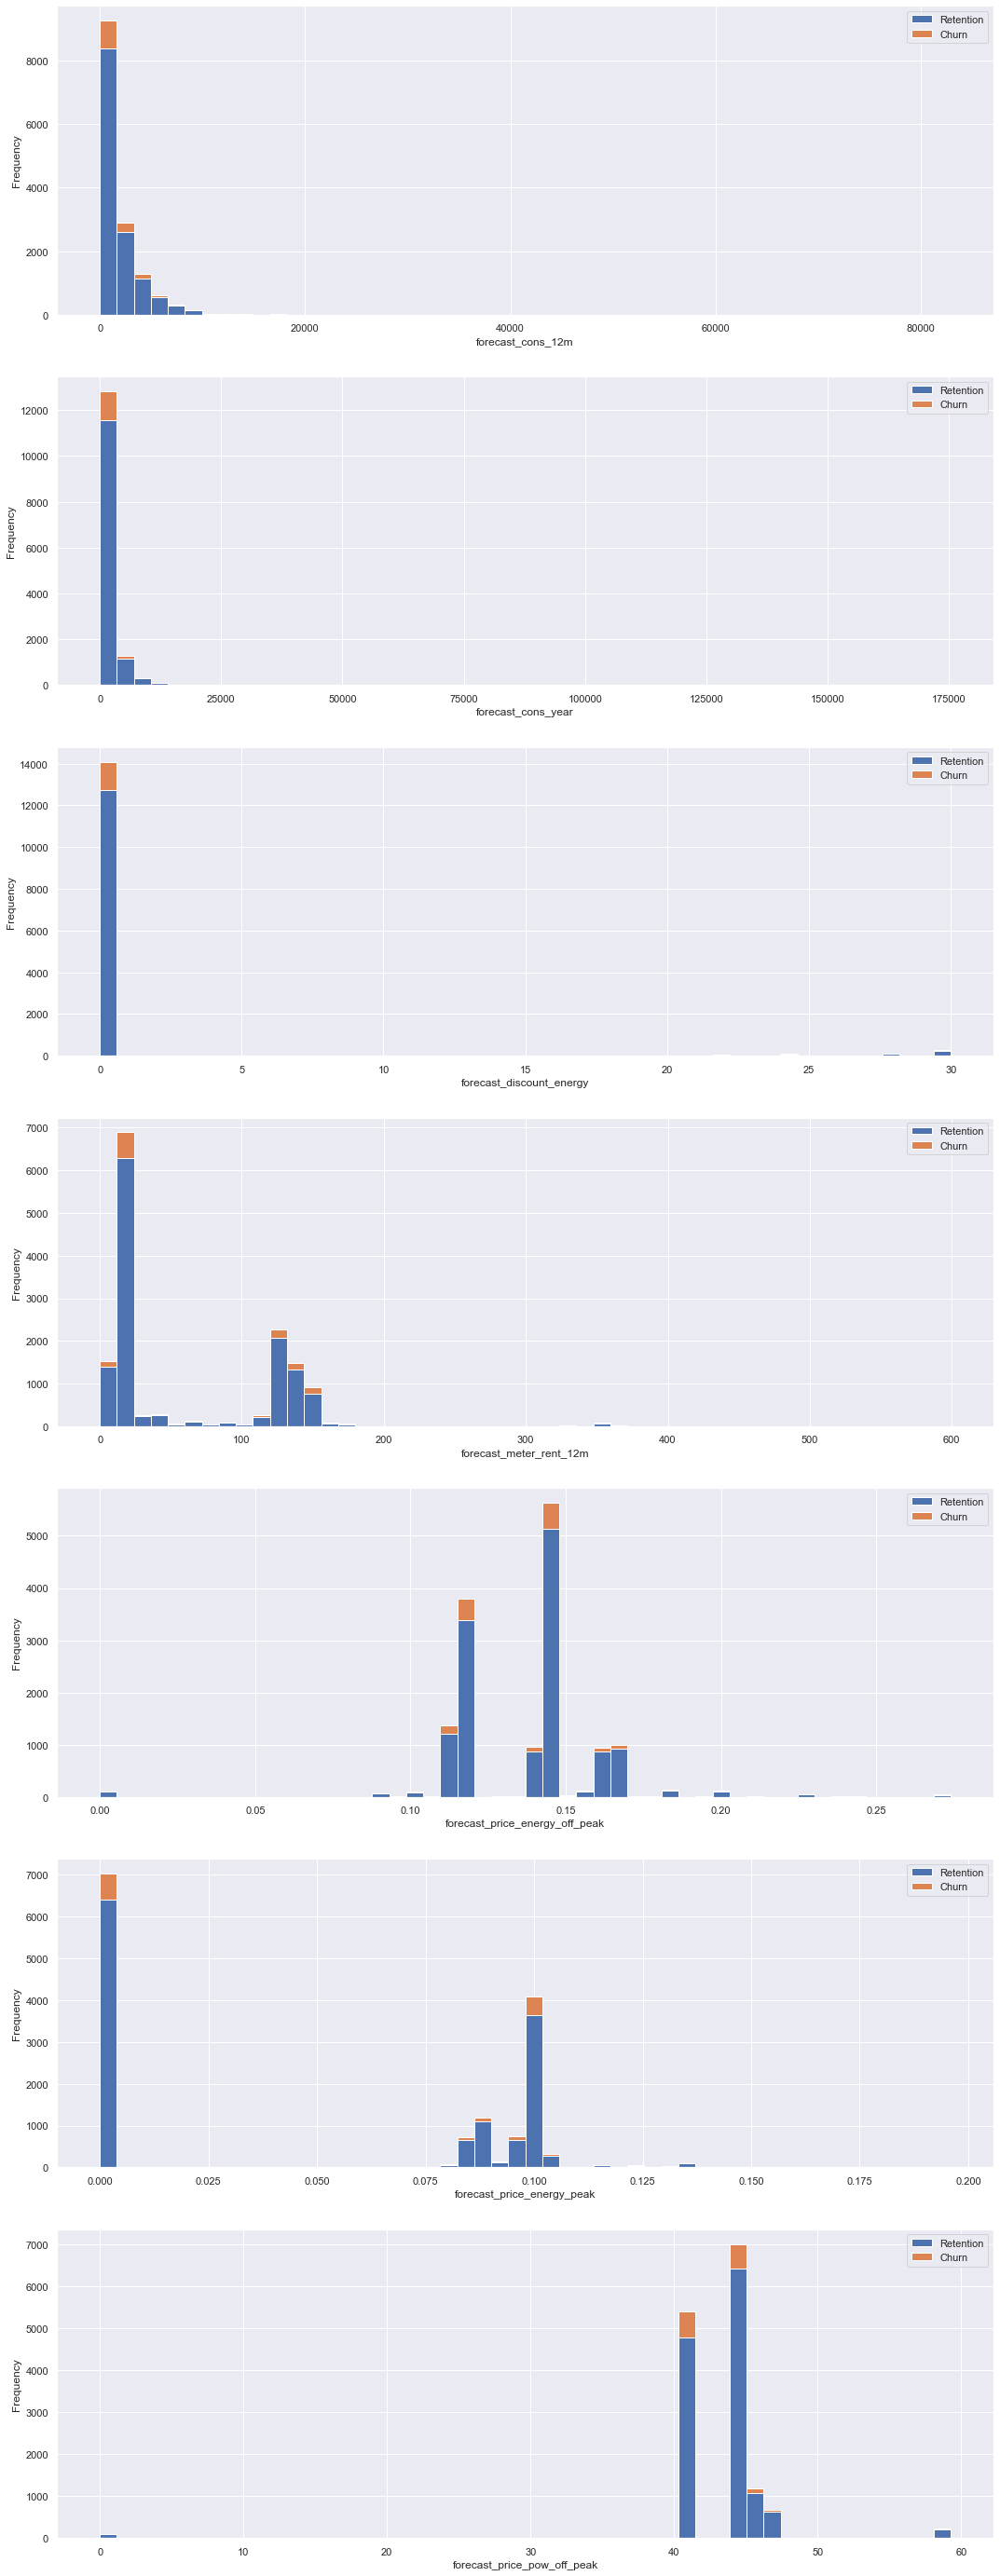

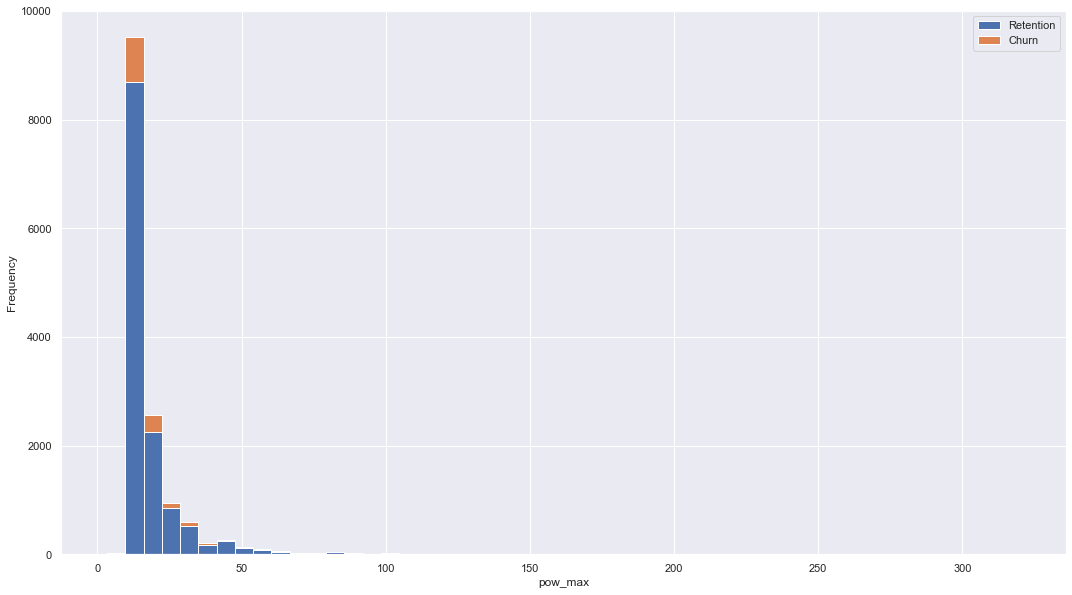

In [20]:
forecast_path = '/Users/hoangtran/Desktop/BCG /asset task3 /output2.png'
pow_max_path = '/Users/hoangtran/Desktop/BCG /asset task3 /output4.png'
display(Image(filename=forecast_path, width=600))
display(Image(filename=pow_max_path, width=600))

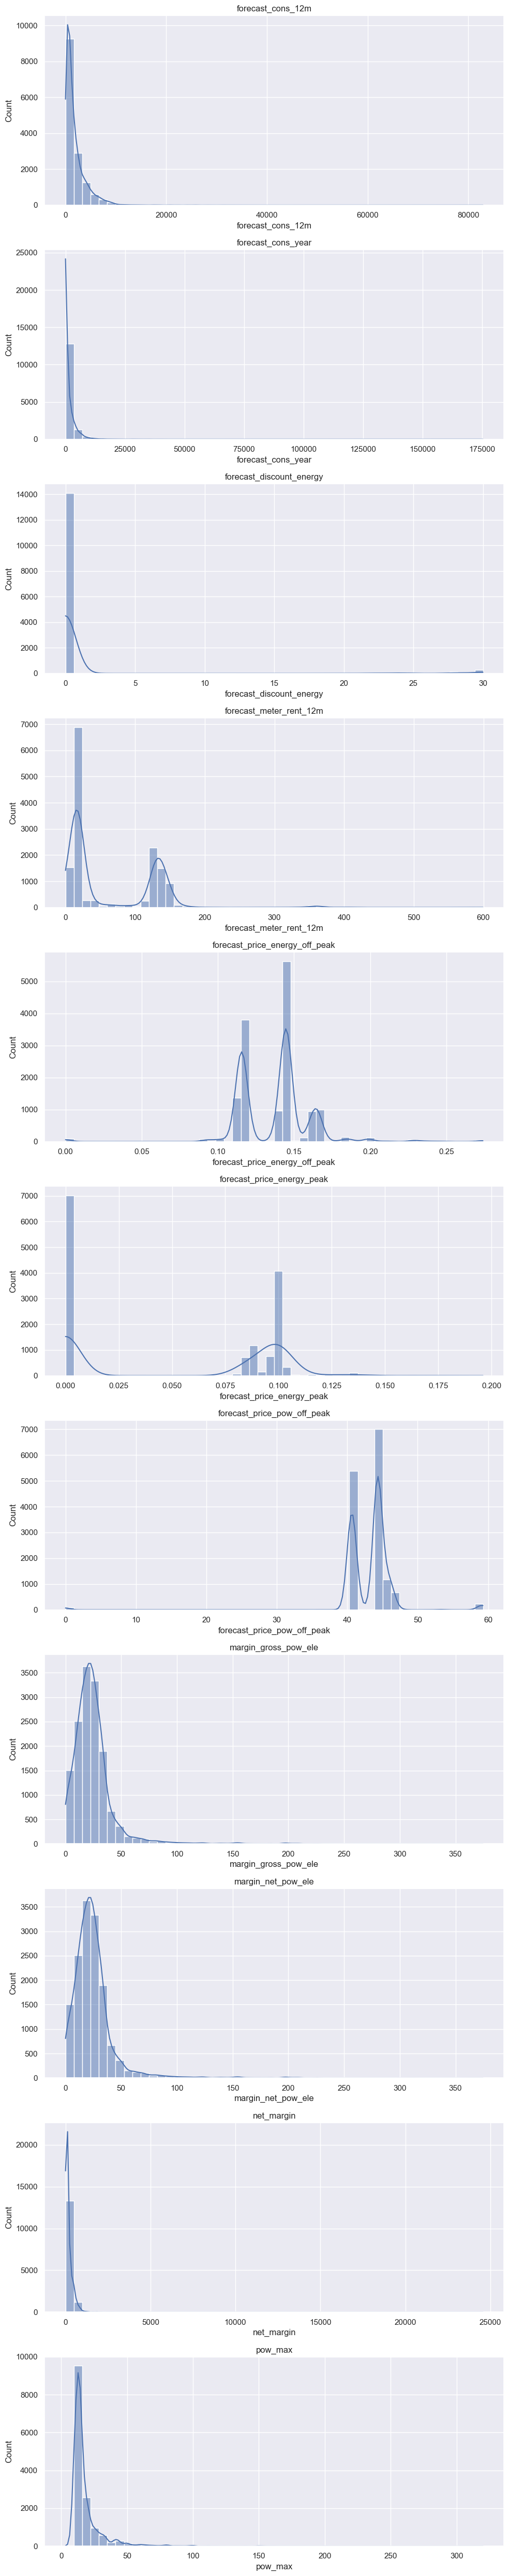

In [21]:
plt_col = ['forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max']
fig, axs = plt.subplots(nrows= len(plt_col), figsize=(10,50))
for i in range(len(plt_col)):
    sns.histplot(data=df[plt_col[i]], ax=axs[i], bins = 50, kde =True)
    axs[i].set_title(plt_col[i])

plt.tight_layout()
plt.show()


After revisiting the plot of distribution: i have decided to group the features into 2 group - consumption related & client's priceing related to handle them more easily

- consumption_features = ['cons_12m', 'cons_gas_12m', 'imp_cons', \
'forecast_cons_year', 'forecast_cons_12m', 'forecast_discount_energy', \
'forecast_meter_rent_12m', 'margin_gross_pow_ele',\
 'net_margin', 'pow_max', 'forecast_price_energy_off_peak', \
 'forecast_price_energy_peak', 'forecast_price_pow_off_peak'
] # dropped 'margin_net_pow_ele'

- client_pricing_features = [ 'var_year_price_off_peak_fix', 'var_year_price_peak_fix','var_year_price_mid_peak_fix', \
    'var_year_price_off_peak', 'var_year_price_peak', 'var_year_price_mid_peak', \
    'var_6m_price_off_peak_var','var_6m_price_peak_var', 'var_6m_price_mid_peak_var', \
    'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix','var_6m_price_mid_peak_fix', \
    'var_6m_price_off_peak','var_6m_price_peak', 'var_6m_price_mid_peak' ]

- since 'nb_prod_act' and 'num_year_antig' is a discrete value, we will also be handling it accordingly

we need to define a function to compare between transformations techniques for skewed data. the transformation techniques i haved decided on are: Log, Cubic Root, Reciprocal, Bimodal, Box-Cox, Power.
this function is for visually seeing how the transformed data looks compared to the normal distribution. RFCs are robust to a wide range of data distributions, including skewed data. However, they benefit from data that is scaled appropriately.

**Key Points to Consider**

- Normality & symmetry: While not strictly necessary for tree models, transformations that reduce skewness and kurtosis can sometimes improve model performance.

- Spread of Data: A transformation that compresses or expands the spread of data can impact how a RFC handles the feature, as it splits on feature values to create decision trees.

- Outlier Impact: Features with outliers can lead to suboptimal splits in tree-based models. Transformations that reduce the influence of outliers can be beneficial.

In [22]:

def plot_transformations(feature, title):
    fig, axs = plt.subplots(4, 2, figsize=(14, 20))
    axs = axs.flatten()
    feature = feature.flatten()
    
    transformations = [
        ('Original', feature, 'g'),
        ('Log Transformation', np.log10(feature + 1), 'b'),
        ('Cubic Root Transformation', np.cbrt(feature), 'r'),
        ('Reciprocal Transformation', 1 / (feature + 1e-9), 'm'),
        ('Bimodal Transformation', np.concatenate([feature, -feature]), 'c'),
        ('Box-Cox Transformation', boxcox(feature - feature.min() + 1)[0], 'y'),
        ('Power Transformation', PowerTransformer(method='yeo-johnson', standardize=False).fit_transform(feature.reshape(-1, 1)).ravel(), 'k')
    ]

    for i, (name, transformed_feature, color) in enumerate(transformations):
        # Plot histogram
        axs[i].hist(transformed_feature, bins=50, density=True, alpha=0.6, color=color, edgecolor='black', linewidth=0.5)
        
        # Fit a normal distribution to the data
        mu, std = norm.fit(transformed_feature)
        
        # Calculate KDE
        kde = gaussian_kde(transformed_feature)
        xmin, xmax = axs[i].get_xlim()
        x = np.linspace(xmin, xmax, 1000)
        p = kde(x)
        
        # Plot the KDE
        axs[i].plot(x, p, color='blue', linestyle='-', linewidth=2)
        
        # Plot the normal distribution fit
        p_norm = norm.pdf(x, mu, std)
        axs[i].plot(x, p_norm, color='red', linestyle='--', linewidth=1.5)
        
        # Add a rug plot
        axs[i].plot(transformed_feature, np.zeros_like(transformed_feature) - 0.001, '|', color='black', alpha=0.7)
        
        # Set the title with statistics
        axs[i].set_title(f'{name}\nMean: {mu:.2f}, Std: {std:.2f}, '
                         f'Kurtosis: {kurtosis(transformed_feature):.2f}, Skew: {skew(transformed_feature):.2f}')
        
        axs[i].set_xlabel('Value')
        axs[i].set_ylabel('Density')
    
    plt.tight_layout()
    plt.suptitle(f'Transformation Analysis of {title}', fontsize=16, y=1.02)
    plt.show()


In [23]:
# feature_test = np.array(df[['forecast_price_pow_off_peak']])
# plot_transformations(feature_test, 'forecast_price_pow_off_peak')



### done inspecting 14 cols in the consumption category

after testing and inspecting the visual representation, this is the technique i have decided on 

***CONSUMPTION FEATURES**	

- log 10

net_margin	***log10*** **mean:2.01 std:0.55 kurt:2.00 skew:-0.97**

cons_gas_12m ***log10*** **mean0.78 std:1.72 kurt1.83 skew:1.88**

forecast_price_energy_off_peak	 ***log10*** **mean0.02 std 0.02 kurt-1.90 skew-0.02**

forecast_price_energy_peak  ***log10*** **std 0.02**

- cuberoot

forecast_price_pow_off_peak	 ***np.cbrt(feature)*** **mean3.49 std0.29 kurt131.51 skew-11.13** but the skew is higher than original 

imp_cons	 ***np.cbrt(feature)*** **mean 3.24 std3.23 kurt:-0.46.00 skew:0.52**

- boxcox 

forecast_cons_12m	 ***boxcox(feature - feature.min() + 1)[0]*** **mean: 21.14 std:8.09 kurt:0.68 skew:0.05**

forecast_cons_year	***boxcox(feature - feature.min() + 1)[0]*** **mean: 4.69 std:4.2 kurt:-1.75 skew:-0.08**

cons_last_month ***boxcox(feature - feature.min() + 1)[0]*** **mean:5.99 std:4.79 kurt:-1.19 skew:-0.05**

cons_12m	 ***boxcox(feature - feature.min() + 1)[0]*** **mean 11.09 std2.59 kut3.08 skew0.08**

margin_gross_pow_ele	***boxcox(feature - feature.min() + 1)[0]*** **mean:5.20 std:1.86 kurt:2.83 skew:0.17**

forecast_meter_rent_12m	 ***boxcox(feature - feature.min() + 1)[0]*** **mean:5.03 std:2.31 kurt:-0.73 skew:-0.05**

- yeo-johnson

pow_max	 ***PowerTransformer(method='yeo-johnson', standardize=False).fit_transform(feature.reshape(-1, 1)).ravel()*** **mean0.75 std0.01 kurt 4.2 skew-0.10**

- drop 
~~6	forecast_discount_energy~~ *not normally distributed* -> transfomr to bool 

margin_net_pow_ele	**std 0.34** (DROPPED) due to 1-1 correlation coef to margin_gross_pow_ele

In [24]:
# del feature_test, feature_reciprocal

In [25]:
consumption_features = ['cons_12m', 'cons_gas_12m', 'imp_cons', \
'forecast_cons_year', 'forecast_cons_12m', 'forecast_discount_energy', \
'forecast_meter_rent_12m', 'margin_gross_pow_ele',\
 'net_margin', 'pow_max', 'forecast_price_energy_off_peak', \
 'forecast_price_energy_peak', 'forecast_price_pow_off_peak'
] # dropped 'margin_net_pow_ele'

client_pricing_features = [ 'var_year_price_off_peak_fix', 'var_year_price_peak_fix','var_year_price_mid_peak_fix', \
    'var_year_price_off_peak', 'var_year_price_peak', 'var_year_price_mid_peak', \
    'var_6m_price_off_peak_var','var_6m_price_peak_var', 'var_6m_price_mid_peak_var', \
    'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix','var_6m_price_mid_peak_fix', \
    'var_6m_price_off_peak','var_6m_price_peak', 'var_6m_price_mid_peak' ]


In [26]:
#  log 10
df['net_margin'] = np.log10(df['net_margin'] + 1)
df['cons_gas_12m'] = np.log10(df['cons_gas_12m'] + 1)
df['forecast_price_energy_off_peak'] = np.log10(df['forecast_price_energy_off_peak'] + 1)
df['forecast_price_energy_peak'] = np.log10(df['forecast_price_energy_peak'] + 1)   

#  cubic root
df['forecast_price_pow_off_peak'] = np.cbrt(df['forecast_price_pow_off_peak'])
df['imp_cons'] = np.cbrt(df['imp_cons'])

#boxcox
df['forecast_cons_12m'] = boxcox(df['forecast_cons_12m'] - df['forecast_cons_12m'].min() + 1)[0]
df['forecast_cons_year'] = boxcox(df['forecast_cons_year'] - df['forecast_cons_year'].min() + 1)[0]
df['cons_last_month'] = boxcox(df['cons_last_month'] - df['cons_last_month'].min() + 1)[0]
df['cons_12m'] = boxcox(df['cons_12m'] - df['cons_12m'].min() + 1)[0]
df['margin_gross_pow_ele'] = boxcox(df['margin_gross_pow_ele'] - df['margin_gross_pow_ele'].min() + 1)[0]
df['forecast_meter_rent_12m'] = boxcox(df['forecast_meter_rent_12m'] - df['forecast_meter_rent_12m'].min() + 1)[0]

# yeo-johnson
df['pow_max'] = PowerTransformer(method='yeo-johnson', standardize=False).fit_transform(df['pow_max'].values.reshape(-1, 1)).ravel()

# boolean groupings 
df['forecast_discount_energy_bool'] = df['forecast_discount_energy'] > 0

# drop columns with 1-1 correlation coef 
df = df.drop(columns=['margin_net_pow_ele'])

In [27]:
df[consumption_features].describe()

cons_12m  cons_gas_12m      imp_cons  forecast_cons_year  \
count  14606.000000  14606.000000  14606.000000        14606.000000   
mean      11.089136      0.779244      3.238904            4.694318   
std        2.590446      1.717071      3.227826            4.204297   
min        0.000000      0.000000      0.000000            0.000000   
25%        9.658511      0.000000      0.000000            0.000000   
50%       10.804713      0.000000      3.344038            6.379621   
75%       12.172365      0.000000      5.788761            8.543997   
max       19.175208      6.618528     24.685549           15.063083   

       forecast_cons_12m  forecast_discount_energy  forecast_meter_rent_12m  \
count       14606.000000              14606.000000             14606.000000   
mean           21.139833                  0.966726                 5.031935   
std             8.091400                  5.108289                 2.309781   
min             0.000000                  0.000000                 0.000000   
25%            15.937327                  0.000000                 3.658250   
50%            20.693872                  0.000000                 3.890987   
75%            26.275374                  0.000000                 7.615159   
max            73.692592                 30.000000                11.582919   

       margin_gross_pow_ele    net_margin       pow_max  \
count          14606.000000  14606.000000  14606.000000   
mean               5.205429      2.010007      0.748231   
std                1.859142      0.551834      0.008443   
min                0.000000      0.000000      0.654115   
25%                4.319004      1.713596      0.743697   
50%                5.307017      2.055111      0.746760   
75%                6.178197      2.387563      0.754346   
max               17.372568      4.390434      0.769468   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.055766                    0.020918   
std                          0.009438                    0.020296   
min                          0.000000                    0.000000   
25%                          0.047796                    0.000000   
50%                          0.058109                    0.035085   
75%                          0.059316                    0.040933   
max                          0.105157                    0.077722   

       forecast_price_pow_off_peak  
count                 14606.000000  
mean                      3.490313  
std                       0.290328  
min                       0.000000  
25%                       3.437156  
50%                       3.538657  
75%                       3.538657  
max                       3.898846

In [28]:

def plot_transformed(features, figsize):
    fig, axs = plt.subplots(nrows=len(features),ncols=1, figsize=figsize)
    axs = axs.flatten()
    for i, feature in enumerate(features):
        name_feature = features[i]
        feature = df[features[i]].to_numpy().flatten()
        # Plot histogram
        axs[i].hist(feature, bins=50, density=True, alpha=0.6, edgecolor='black', linewidth=0.5)
        
        # Fit a normal distribution to the data
        mu, std = norm.fit(feature)
        
        # Calculate KDE
        kde = gaussian_kde(feature)
        xmin, xmax = axs[i].get_xlim()
        x = np.linspace(xmin, xmax, 1000)
        p = kde(x)
        
        # Plot the KDE
        axs[i].plot(x, p, color='blue', linestyle='-', linewidth=2)
        
        # Plot the normal distribution fit
        p_norm = norm.pdf(x, mu, std)
        axs[i].plot(x, p_norm, color='red', linestyle='--', linewidth=1.5)
        
        # Add a rug plot
        axs[i].plot(feature, np.zeros_like(feature) - 0.001, '|', color='black', alpha=0.7)
        
        # Set the title with statistics
        axs[i].set_title(f'{name_feature}\nMean: {mu:.2f}, Std: {std:.2f}, '
                            f'Kurtosis: {kurtosis(feature):.2f}, Skew: {skew(feature):.2f}')
        
        axs[i].set_xlabel('Value')
        axs[i].set_ylabel('Density')

    plt.tight_layout()
    # plt.suptitle(f'Transformed distribution of {features}', fontsize=16, y=1.02)
    plt.show()


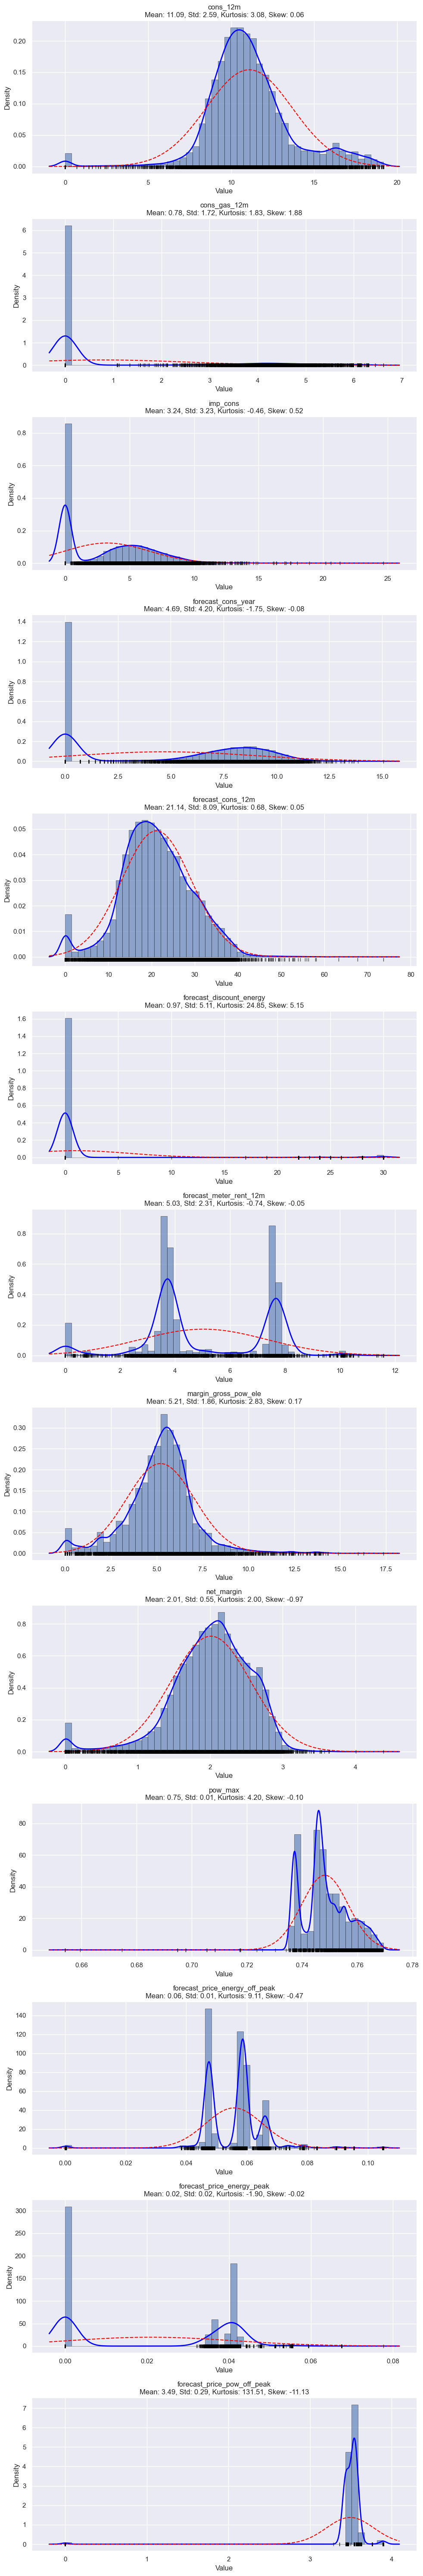

In [29]:

plot_transformed(consumption_features, (10,60))

In [30]:
# del feature, features , p, p_norm, x

In [31]:
print(df[['num_years_antig']].value_counts()) # this is not discrete how ever this value directly correllate with the date_activ / date_end features, \
                                            # hence it is better to have the date_activ and date_end features be combine into a diff_ativ_end (in months) to subsititue this columns 
print(df[['nb_prod_act']].value_counts()) # this column has a sever outlier at value 32, hence we can drop that value and proceed to transform this like a numerical data type feature

num_years_antig
6                  4769
4                  3982
3                  2433
5                  2317
7                   509
11                  185
12                  110
8                   103
9                    92
10                   81
13                   13
2                    11
1                     1
Name: count, dtype: int64
nb_prod_act
1              11431
2               2445
3                523
4                150
5                 31
9                 11
6                  8
8                  4
10                 2
32                 1
Name: count, dtype: int64


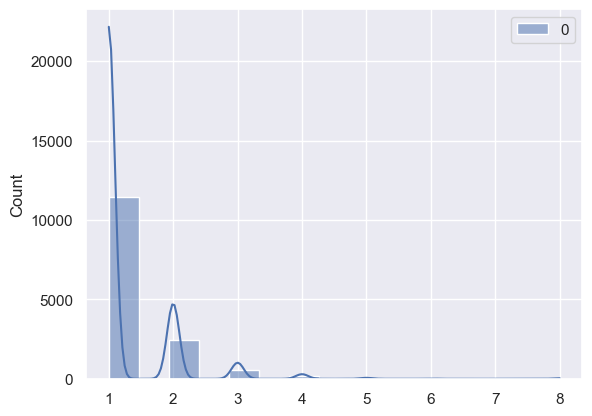

In [32]:
nb_prod_act = df[['nb_prod_act']].to_numpy()
nb_prod_act = np.clip(nb_prod_act, np.percentile(nb_prod_act,0), np.percentile(nb_prod_act,99.9))
ax = plt.plot(figsize=(10,5))
sns.histplot((nb_prod_act), kde=True )

# substituing outlier  
df['nb_prod_act'] = df['nb_prod_act'].replace(32, 10)
df = df.drop(columns=['num_years_antig'])
del nb_prod_act

### c. Datetime features:
datetime = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
- first thing to do is to examine the time range between each one of the activity up till the reference date (Jan 2016) :


In [33]:
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [34]:
ref_date = datetime(2016, 1,1)

In [35]:
# Create reference date
def months_from(ref_date, datetime_col, id_col, df): 
    """
    Calculates the number of months between a reference date and a date column of a DataFrame.

    Parameters:
    ref_date (pd.Timestamp): The reference date.
    datetime_col (str): The name of the date column in the DataFrame.
    id_col (str): The name of the identifier column in the DataFrame.
    df (pd.DataFrame): The DataFrame containing the date column.

    Returns:
    pd.DataFrame: A DataFrame with id and corresponding months.
    """
    time_delta = ref_date - df[datetime_col]
    months = (time_delta / np.timedelta64(1, 'D') / 30.44).astype(float)
    result = pd.DataFrame({id_col: df[id_col], 'months': months})
    return result
# Assuming you have a reference date, for example:


# Create columns using the months_from function
months_id_activ = months_from(ref_date, 'date_activ', 'id', df)
months_to_end = months_from(ref_date, 'date_end', 'id', df)
months_modif_prod = months_from(ref_date, 'date_modif_prod', 'id', df)
months_renewal = months_from(ref_date, 'date_renewal', 'id', df)

# Corrected merging of DataFrames
months_from_df = months_id_activ.merge(months_to_end, on='id', how='left', suffixes=('', '_to_end'))
months_from_df = months_from_df.merge(months_modif_prod, on='id', how='left', suffixes=('', '_modif_prod'))
months_from_df = months_from_df.merge(months_renewal, on='id', how='left', suffixes=('', '_renewal'))

months_from_df[['months_to_end']] = -months_from_df[['months_to_end']] # the end of contract seem to be after the ref date (hence invert for scaling)

In [36]:
## 903 rows × 5 columns with months_from_df[months_from_df['months_renewal'] <0]
## 61 rows × 5 columns with months_from_df[months_from_df['months_modif_prod'] <0]


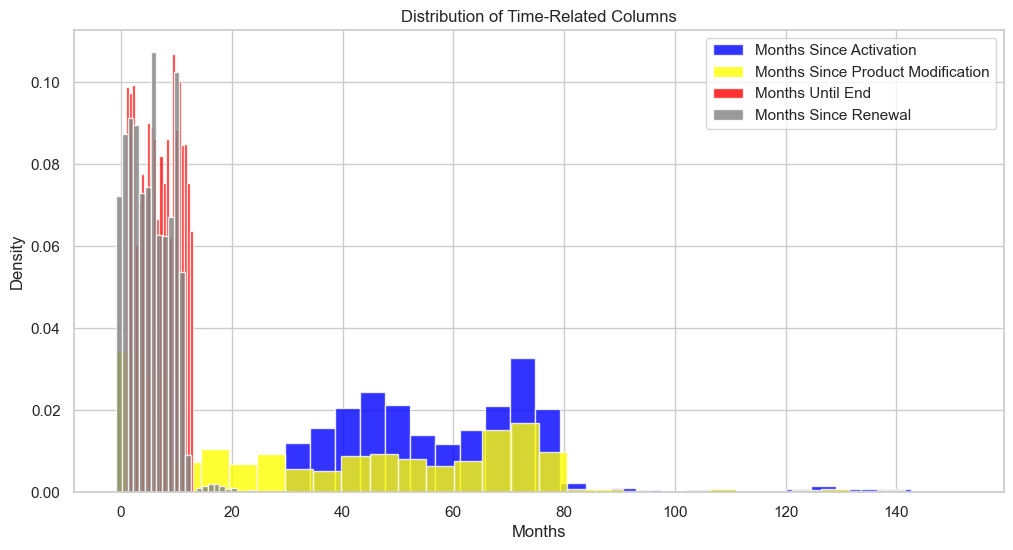

In [37]:

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(months_from_df['months'], bins=30, alpha=0.8, density=True, label='Months Since Activation', color='blue')
ax.hist(months_from_df['months_modif_prod'], bins=30, alpha=0.8, density=True, label='Months Since Product Modification', color='yellow')
ax.hist(months_from_df['months_to_end'], bins=30, alpha=0.8, density=True, label='Months Until End', color='red')
ax.hist(months_from_df['months_renewal'], bins=30, alpha=0.8, density=True, label='Months Since Renewal', color='grey')

ax.set_title('Distribution of Time-Related Columns')
ax.set_xlabel('Months')
ax.set_ylabel('Density')

ax.legend()

plt.show()

- since the 'months' and the 'months_modif_prod' both show a good enough distribution, we will merge it into the df  

In [38]:
df['date_activ'] = months_from_df['months']
df['date_modif_prod'] = months_from_df['months_modif_prod']

In [39]:
months_from_df.corr(numeric_only=True)


months  months_to_end  months_modif_prod  months_renewal
months             1.000000       0.056683           0.446638       -0.064737
months_to_end      0.056683       1.000000          -0.148323       -0.890405
months_modif_prod  0.446638      -0.148323           1.000000        0.057471
months_renewal    -0.064737      -0.890405           0.057471        1.000000

**note**: high multi-colinear risk between the months_modif_prod and months_to_end
we can further investage by seeing the difference btwn these 2 moclumns 

In [40]:
didd_end_rnw = df['date_end'] - df['date_renewal'] # months_to_end was inverted as no of month from ref_date till date_end (bc date_end is after ref_date)
                                                                                    # months_renewal is still no of month from date_renewal to ref_date
months_rnw_end = (didd_end_rnw / np.timedelta64(1, 'D') / 30.44).astype(float)
# months_rnw_end[months_rnw_end>12] # 656 rows


In [74]:
del didd_end_rnw

<Axes: ylabel='Count'>

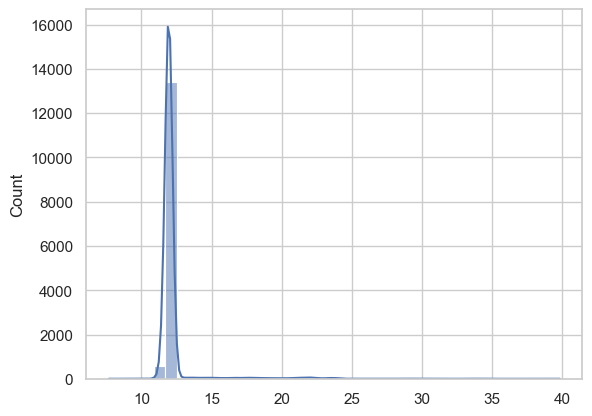

In [41]:
sns.histplot(months_rnw_end, bins =40, kde=True) 

from the visualization, we can add another column indicating difference between date_end and date_renewal is >= 12months (1year)


In [42]:
df['date_end'] =  months_from_df['months_to_end']
# Create a new column with the boolean values
df['date_renewal'] =  months_from_df['months_renewal']

df['months_rnw_end'] = months_rnw_end
df['more_than_1yr'] = df['months_rnw_end'] > 12
df = df.drop(columns=['months_rnw_end'])

In [43]:
# print(df.columns)
print(df.dtypes)

id                                                  object
cons_12m                                           float64
cons_gas_12m                                       float64
cons_last_month                                    float64
date_activ                                         float64
date_end                                           float64
date_modif_prod                                    float64
date_renewal                                       float64
forecast_cons_12m                                  float64
forecast_cons_year                                 float64
forecast_discount_energy                           float64
forecast_meter_rent_12m                            float64
forecast_price_energy_off_peak                     float64
forecast_price_energy_peak                         float64
forecast_price_pow_off_peak                        float64
has_gas                                           category
imp_cons                                           float

In [44]:
del months_from_df, months_id_activ, months_modif_prod, months_renewal, months_to_end, months_rnw_end

#### from the visualization,  my hypothesis when dealing with predicting churn risk from date range between a certain activity(eg: activation, end of contract, modification of product , renewal of contract) up untill the refernece date (Jan 2016)  are:

- - the longer its' been since the client's been activated until the ref date =  the higher the risk churn: the client life cycle 
- - the longer its' been since the client's modified their product until the ref date =  the higher the risk churn: the client's less engaged in PowerCo's update on product offerings  
- - the longer it's until the client's end of contract until the renewal date the   = the lower the risk churn: willingness to stay 


---
### 3a. Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [45]:
price_df = pd.read_csv('/Users/hoangtran/Desktop/BCG_test/BCG-DS-virtual-internship/Taks3_FeatureEngineering/price_data.csv')
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format='%Y-%m-%d')
# price_df.head(24)

In [46]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

Now it is time to get creative and to conduct some of your own feature engineering! Have fun with it, explore different ideas and try to create as many as yo can!

In [47]:
df = pd.merge(df, diff, on='id')
del diff, monthly_price_by_id, jan_prices, dec_prices
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944         0.000000   
1  d29c2c54acc38ff3c0614d0a653813dd  9.414166      0.000000         0.000000   
2  764c75f661154dac3a6c254cd082ea7d  6.829002      0.000000         0.000000   
3  bba03439a292a1e166f80264c16191cb  8.097416      0.000000         0.000000   
4  149d57cf92fc41cf94415803a877cb4b  9.350191      0.000000         6.941831   

   date_activ  date_end  date_modif_prod  date_renewal  forecast_cons_12m  \
0   30.551905  5.453351         2.003942      6.307490           0.000000   
1   76.346912  7.950066        76.346912      4.040736          11.501676   
2   68.528252  3.482260        68.528252      8.508541           6.849520   
3   69.086728  2.923784        69.086728      9.067017          12.482005   
4   71.583443  2.168200        71.583443      9.789750          15.394345   

   forecast_cons_year  ...  channel_sales_lmkebamcaaclubfxadlmueccxoimlema  \
0            0.000000  ...                                           False   
1            0.000000  ...                                           False   
2            0.000000  ...                                           False   
3            0.000000  ...                                            True   
4            7.016152  ...                                           False   

   channel_sales_usilxuppasemubllopkaafesmlibmsdf  origin_up_MISSING  \
0                                           False              False   
1                                           False              False   
2                                           False              False   
3                                           False              False   
4                                           False              False   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                       False   
1                                        True   
2                                        True   
3                                        True   
4                                        True   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

  origin_up_lxidpiddsbxsbosboudacockeimpuepw  forecast_discount_energy_bool  \
0                                       True                          False   
1                                      False                          False   
2                                      False                          False   
3                                      False                          False   
4                                      False                          False   

   more_than_1yr  offpeak_diff_dec_january_energy  \
0          False                         0.020057   
1          False                        -0.003767   
2          False                        -0.004670   
3          False                        -0.004547   
4          False                        -0.006192   

   offpeak_diff_dec_january_power  
0                        3.700961  
1                        0.177779  
2                        0.177779  
3                        0.177779  
4                        0.162916  

[5 rows x 53 columns]

___
### General price_df info 
- price_df.index.nunique() # 193002
- price_df.shape # **(193002, 8)**
- price_df.info() 

| - |   Column|              Non-Null| Count|   Dtype|         
|---|  ------|              -------|-------|   -----|         
| 0  |id                  |193002| non-null|  object        |
|1  | price_date          |193002| non-null|  datetime64[ns]|
|2|   price_off_peak_var  |193002| non-null|  float64       |
|3 |  price_peak_var      |193002| non-null|  float64       |
| 4 |  price_mid_peak_var  |193002| non-null|  float64       |
| 5  | price_off_peak_fix  |193002| non-null|  float64       |
| 6   |price_peak_fix      |193002| non-null|  float64       |
|7   |price_mid_peak_fix  |193002| non-null|  float64       |


In [48]:
price_df.describe()

price_date  price_off_peak_var  price_peak_var  \
count                         193002       193002.000000   193002.000000   
mean   2015-06-16 12:50:49.933161216            0.141027        0.054630   
min              2015-01-01 00:00:00            0.000000        0.000000   
25%              2015-04-01 00:00:00            0.125976        0.000000   
50%              2015-07-01 00:00:00            0.146033        0.085483   
75%              2015-10-01 00:00:00            0.151635        0.101673   
max              2015-12-01 00:00:00            0.280700        0.229788   
std                              NaN            0.025032        0.049924   

       price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
count       193002.000000       193002.000000   193002.000000   
mean             0.030496           43.334477       10.622875   
min              0.000000            0.000000        0.000000   
25%              0.000000           40.728885        0.000000   
50%              0.000000           44.266930        0.000000   
75%              0.072558           44.444710       24.339581   
max              0.114102           59.444710       36.490692   
std              0.036298            5.410297       12.841895   

       price_mid_peak_fix  
count       193002.000000  
mean             6.409984  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%             16.226389  
max             17.458221  
std              7.773592

The price_df contains all the pricing of 6 types (offpeak/peak/midpeak)*(var/fix) data of 12 months per client:

On PowerCo's [pdf about their pricing policy](https://www.powerco.co.nz/-/media/project/powerco/powerco-documents/who-we-are---pricing-and-disclosures/disclosures/electricity-disclosures/tables-explained_from_2025.pdf) and for the whole electricity & power sector, there usually is a price shift during winter and/or summer. Since the pricing in the electricity/power industry is demand-based, there is typically a significant gap between off-peak and peak/mid-peak rates. The general consensus in the industry is to have the off-peak price be the lowest, and the peak price be the highest, with the mid-peak price falling somewhere in between. However, the difference between these rates is dictated by the provider’s cost structure, demand patterns, and market or regulatory factors.

* ***Firstly*** we want to aggregate the pricings according to seasonal's mean pricing 
    '3. ’Winter’ months are April – September, and ‘Summer’ months are October – March' - PowerCo's pdf
For this we will add 12 columns: \
    - 'price_offp_var_s', 'price_peak_var_s', 'price_midp_var_s', 'price_offp_fix_s', 'price_peak_fix_s', 'price_midp_fix_s': for avg pricings in the sumemr  
    - 'price_offp_var_w', 'price_peak_var_w', 'price_midp_var_w', 'price_offp_fix_w', 'price_peak_fix_w', 'price_midp_fix_w': for avg pricing in the winter  


In [49]:
price_df['month'] = price_df['price_date'].dt.month
season_map = {1: 'summer', 2: 'summer', 3: 'summer',
              4: 'winter', 5: 'winter', 6: 'winter',
              7: 'winter', 8: 'winter', 9: 'winter',
              10: 'summer', 11: 'summer', 12: 'summer'}

price_df['Season'] = price_df['month'].map(season_map)
price_df.head()


id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  month  Season  
0                 0.0      1  summer  
1                 0.0      2  summer  
2                 0.0      3  summer  
3                 0.0      4  winter  
4                 0.0      5  winter

In [50]:
pricing_cols = [
    'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
    'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix'
]

In [51]:
def calculate_seasonal_mean_pricing(df, season):
    seasonal_df = df[df['Season'] == season]
    mean_prices = seasonal_df.groupby('id')[pricing_cols].mean().reset_index()
    for col in pricing_cols:
        mean_prices.rename(columns={ col: f'{col}_{season[0]}'}, inplace=True)
    return mean_prices


In [52]:
winter_mean_prices = calculate_seasonal_mean_pricing(price_df, 'winter')
summer_mean_prices = calculate_seasonal_mean_pricing(price_df, 'summer')
# summer_mean_prices
mean_prices = pd.merge(winter_mean_prices, summer_mean_prices, on='id')
mean_prices.head()

id  price_off_peak_var_w  price_peak_var_w  \
0  0002203ffbb812588b632b9e628cc38d              0.125347          0.104452   
1  0004351ebdd665e6ee664792efc4fd13              0.146858          0.000000   
2  0010bcc39e42b3c2131ed2ce55246e3c              0.186690          0.000000   
3  0010ee3855fdea87602a5b7aba8e42de              0.119437          0.098640   
4  00114d74e963e47177db89bc70108537              0.148415          0.000000   

   price_mid_peak_var_w  price_off_peak_fix_w  price_peak_fix_w  \
0              0.073755             40.728885         24.437330   
1              0.000000             44.415080          0.000000   
2              0.000000             45.444710          0.000000   
3              0.069037             40.647428         24.388455   
4              0.000000             44.266930          0.000000   

   price_mid_peak_fix_w  price_off_peak_var_s  price_peak_var_s  \
0             16.291555              0.123330          0.103135   
1              0.000000              0.145995          0.000000   
2              0.000000              0.176427          0.000000   
3             16.258971              0.118077          0.097945   
4              0.000000              0.147437          0.000000   

   price_mid_peak_var_s  price_off_peak_fix_s  price_peak_fix_s  \
0              0.072566             40.674580         24.404747   
1              0.000000             44.355821          0.000000   
2              0.000000             45.194710          0.000000   
3              0.069028             40.647427         24.388455   
4              0.000000             44.266931          0.000000   

   price_mid_peak_fix_s  
0             16.269833  
1              0.000000  
2              0.000000  
3             16.258972  
4              0.000000

In [53]:
df = pd.merge(df, mean_prices, on='id')
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944         0.000000   
1  d29c2c54acc38ff3c0614d0a653813dd  9.414166      0.000000         0.000000   
2  764c75f661154dac3a6c254cd082ea7d  6.829002      0.000000         0.000000   
3  bba03439a292a1e166f80264c16191cb  8.097416      0.000000         0.000000   
4  149d57cf92fc41cf94415803a877cb4b  9.350191      0.000000         6.941831   

   date_activ  date_end  date_modif_prod  date_renewal  forecast_cons_12m  \
0   30.551905  5.453351         2.003942      6.307490           0.000000   
1   76.346912  7.950066        76.346912      4.040736          11.501676   
2   68.528252  3.482260        68.528252      8.508541           6.849520   
3   69.086728  2.923784        69.086728      9.067017          12.482005   
4   71.583443  2.168200        71.583443      9.789750          15.394345   

   forecast_cons_year  ...  price_mid_peak_var_w  price_off_peak_fix_w  \
0            0.000000  ...              0.072687             40.647429   
1            0.000000  ...              0.000000             44.266930   
2            0.000000  ...              0.000000             44.415080   
3            0.000000  ...              0.000000             44.444710   
4            7.016152  ...              0.073755             40.728885   

   price_peak_fix_w  price_mid_peak_fix_w  price_off_peak_var_s  \
0         24.388454             16.258969              0.126487   
1          0.000000              0.000000              0.149484   
2          0.000000              0.000000              0.170133   
3          0.000000              0.000000              0.150860   
4         24.437330             16.291555              0.123002   

  price_peak_var_s  price_mid_peak_var_s  price_off_peak_fix_s  \
0         0.099209              0.060374             41.237102   
1         0.000000              0.000000             44.355821   
2         0.088145              0.000000             44.355821   
3         0.000000              0.000000             44.355821   
4         0.102824              0.071976             40.647427   

   price_peak_fix_s  price_mid_peak_fix_s  
0         20.315567             13.543712  
1          0.000000              0.000000  
2          0.000000              0.000000  
3          0.000000              0.000000  
4         24.388455             16.258972  

[5 rows x 65 columns]

In [54]:

del summer_mean_prices, winter_mean_prices, mean_prices
price_df.head()


id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  month  Season  
0                 0.0      1  summer  
1                 0.0      2  summer  
2                 0.0      3  summer  
3                 0.0      4  winter  
4                 0.0      5  winter

* ***Secondly***, considering we are looking at the question is client's price sensitivity driving churn? an aspect to consider how many times per year, a certain pricing type was changed for a client and if changed, were the prices increased, or decreased? If the client sees a large increasre in the rate for a month and having to continue with that rate for a long time, this is a potential reason for switching to a new provider (chunrning) \
hence, this part we will be adding columns: 
    - 'no_months_changed': for total no of time the pricing of any of the 6 types increased compared to the previous month 
    - 'offp_p_diff_var' and 'offp_p_diff_fix': the max differnece between the average of the off_peak hours compared to the peak hours of the variable & fix rate 
    - 'p_mp_diff_var' and 'p_mp_diff_fix': the max differnece between the average of the off_peak hours compared to the peak hours of the variable & fix rate 
    - 'offp_mp_diff_var' 'offp_mp_diff_fix': the max differnece between the average of the peak hours compared to the mid_peak hours of the variable & fix rate 

In [55]:
monthly_avg_price_types = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()


In [56]:
monthly_avg_price_types['offp_p_diff_var'] = monthly_avg_price_types['price_off_peak_var'] -  monthly_avg_price_types['price_peak_var'] 
monthly_avg_price_types['offp_p_diff_fix'] = monthly_avg_price_types['price_off_peak_fix'] -  monthly_avg_price_types['price_peak_fix'] 

monthly_avg_price_types['offp_mp_diff_var'] = monthly_avg_price_types['price_off_peak_var'] -  monthly_avg_price_types['price_mid_peak_var']
monthly_avg_price_types['offp_mp_diff_fix'] =  monthly_avg_price_types['price_off_peak_fix'] - monthly_avg_price_types['price_mid_peak_fix'] 

monthly_avg_price_types['p_mp_diff_var'] = monthly_avg_price_types['price_peak_var'] - monthly_avg_price_types['price_mid_peak_var']
monthly_avg_price_types['p_mp_diff_fix'] =  monthly_avg_price_types['price_peak_fix'] - monthly_avg_price_types['price_mid_peak_fix'] 


In [57]:
max_dif_avg_price_types = monthly_avg_price_types.groupby('id').agg({
    'offp_p_diff_var': 'max',
    'offp_p_diff_fix': 'max',
    'offp_mp_diff_var': 'max',
    'offp_mp_diff_fix': 'max',
    'p_mp_diff_var': 'max',
    'p_mp_diff_fix': 'max'
}).reset_index()

df = pd.merge(df, max_dif_avg_price_types, on='id')

In [58]:
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944         0.000000   
1  d29c2c54acc38ff3c0614d0a653813dd  9.414166      0.000000         0.000000   
2  764c75f661154dac3a6c254cd082ea7d  6.829002      0.000000         0.000000   
3  bba03439a292a1e166f80264c16191cb  8.097416      0.000000         0.000000   
4  149d57cf92fc41cf94415803a877cb4b  9.350191      0.000000         6.941831   

   date_activ  date_end  date_modif_prod  date_renewal  forecast_cons_12m  \
0   30.551905  5.453351         2.003942      6.307490           0.000000   
1   76.346912  7.950066        76.346912      4.040736          11.501676   
2   68.528252  3.482260        68.528252      8.508541           6.849520   
3   69.086728  2.923784        69.086728      9.067017          12.482005   
4   71.583443  2.168200        71.583443      9.789750          15.394345   

   forecast_cons_year  ...  price_mid_peak_var_s  price_off_peak_fix_s  \
0            0.000000  ...              0.060374             41.237102   
1            0.000000  ...              0.000000             44.355821   
2            0.000000  ...              0.000000             44.355821   
3            0.000000  ...              0.000000             44.355821   
4            7.016152  ...              0.071976             40.647427   

   price_peak_fix_s  price_mid_peak_fix_s  offp_p_diff_var offp_p_diff_fix  \
0         20.315567             13.543712         0.060550       44.266930   
1          0.000000              0.000000         0.151367       44.444710   
2          0.000000              0.000000         0.084587       44.444710   
3          0.000000              0.000000         0.153133       44.444710   
4         24.388455             16.258972         0.022225       16.291555   

   offp_mp_diff_var  offp_mp_diff_fix  p_mp_diff_var  p_mp_diff_fix  
0          0.146033          44.26693       0.085483       8.145775  
1          0.151367          44.44471       0.085483       0.000000  
2          0.172468          44.44471       0.089162       0.000000  
3          0.153133          44.44471       0.000000       0.000000  
4          0.055866          24.43733       0.033743       8.145775  

[5 rows x 71 columns]

In [59]:
subset_for_price_change = ['id', 'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
                 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']

subset_price_change_df = price_df.drop_duplicates(subset=subset_for_price_change)

subset_price_change_df = subset_price_change_df.sort_values(by=['id', 'price_date'])
subset_price_change_df = subset_price_change_df.groupby(['id']).count().reset_index()
subset_price_change_df.rename(columns={'month': 'times_price_changed'}, inplace=True)
subset_price_change_df = subset_price_change_df[['id', 'times_price_changed']]
df = pd.merge(df, subset_price_change_df, on='id')

In [60]:
del monthly_avg_price_types, max_dif_avg_price_types, subset_price_change_df


In [61]:
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944         0.000000   
1  d29c2c54acc38ff3c0614d0a653813dd  9.414166      0.000000         0.000000   
2  764c75f661154dac3a6c254cd082ea7d  6.829002      0.000000         0.000000   
3  bba03439a292a1e166f80264c16191cb  8.097416      0.000000         0.000000   
4  149d57cf92fc41cf94415803a877cb4b  9.350191      0.000000         6.941831   

   date_activ  date_end  date_modif_prod  date_renewal  forecast_cons_12m  \
0   30.551905  5.453351         2.003942      6.307490           0.000000   
1   76.346912  7.950066        76.346912      4.040736          11.501676   
2   68.528252  3.482260        68.528252      8.508541           6.849520   
3   69.086728  2.923784        69.086728      9.067017          12.482005   
4   71.583443  2.168200        71.583443      9.789750          15.394345   

   forecast_cons_year  ...  price_off_peak_fix_s  price_peak_fix_s  \
0            0.000000  ...             41.237102         20.315567   
1            0.000000  ...             44.355821          0.000000   
2            0.000000  ...             44.355821          0.000000   
3            0.000000  ...             44.355821          0.000000   
4            7.016152  ...             40.647427         24.388455   

   price_mid_peak_fix_s  offp_p_diff_var  offp_p_diff_fix offp_mp_diff_var  \
0             13.543712         0.060550        44.266930         0.146033   
1              0.000000         0.151367        44.444710         0.151367   
2              0.000000         0.084587        44.444710         0.172468   
3              0.000000         0.153133        44.444710         0.153133   
4             16.258972         0.022225        16.291555         0.055866   

   offp_mp_diff_fix  p_mp_diff_var  p_mp_diff_fix  times_price_changed  
0          44.26693       0.085483       8.145775                    5  
1          44.44471       0.085483       0.000000                    5  
2          44.44471       0.089162       0.000000                    3  
3          44.44471       0.000000       0.000000                    3  
4          24.43733       0.033743       8.145775                    3  

[5 rows x 72 columns]

---

In [62]:
correlation = df.corr(numeric_only=True)
print(correlation['churn'].sort_values(ascending=False))

churn                                             1.000000
origin_up_lxidpiddsbxsbosboudacockeimpuepw        0.094131
margin_gross_pow_ele                              0.089960
channel_sales_foosdfpfkusacimwkcsosbicdxkicaua    0.075964
price_peak_fix_s                                  0.047290
                                                    ...   
channel_sales_MISSING                            -0.041840
date_modif_prod                                  -0.052072
channel_sales_lmkebamcaaclubfxadlmueccxoimlema   -0.052946
date_activ                                       -0.074794
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws       -0.080766
Name: churn, Length: 70, dtype: float64


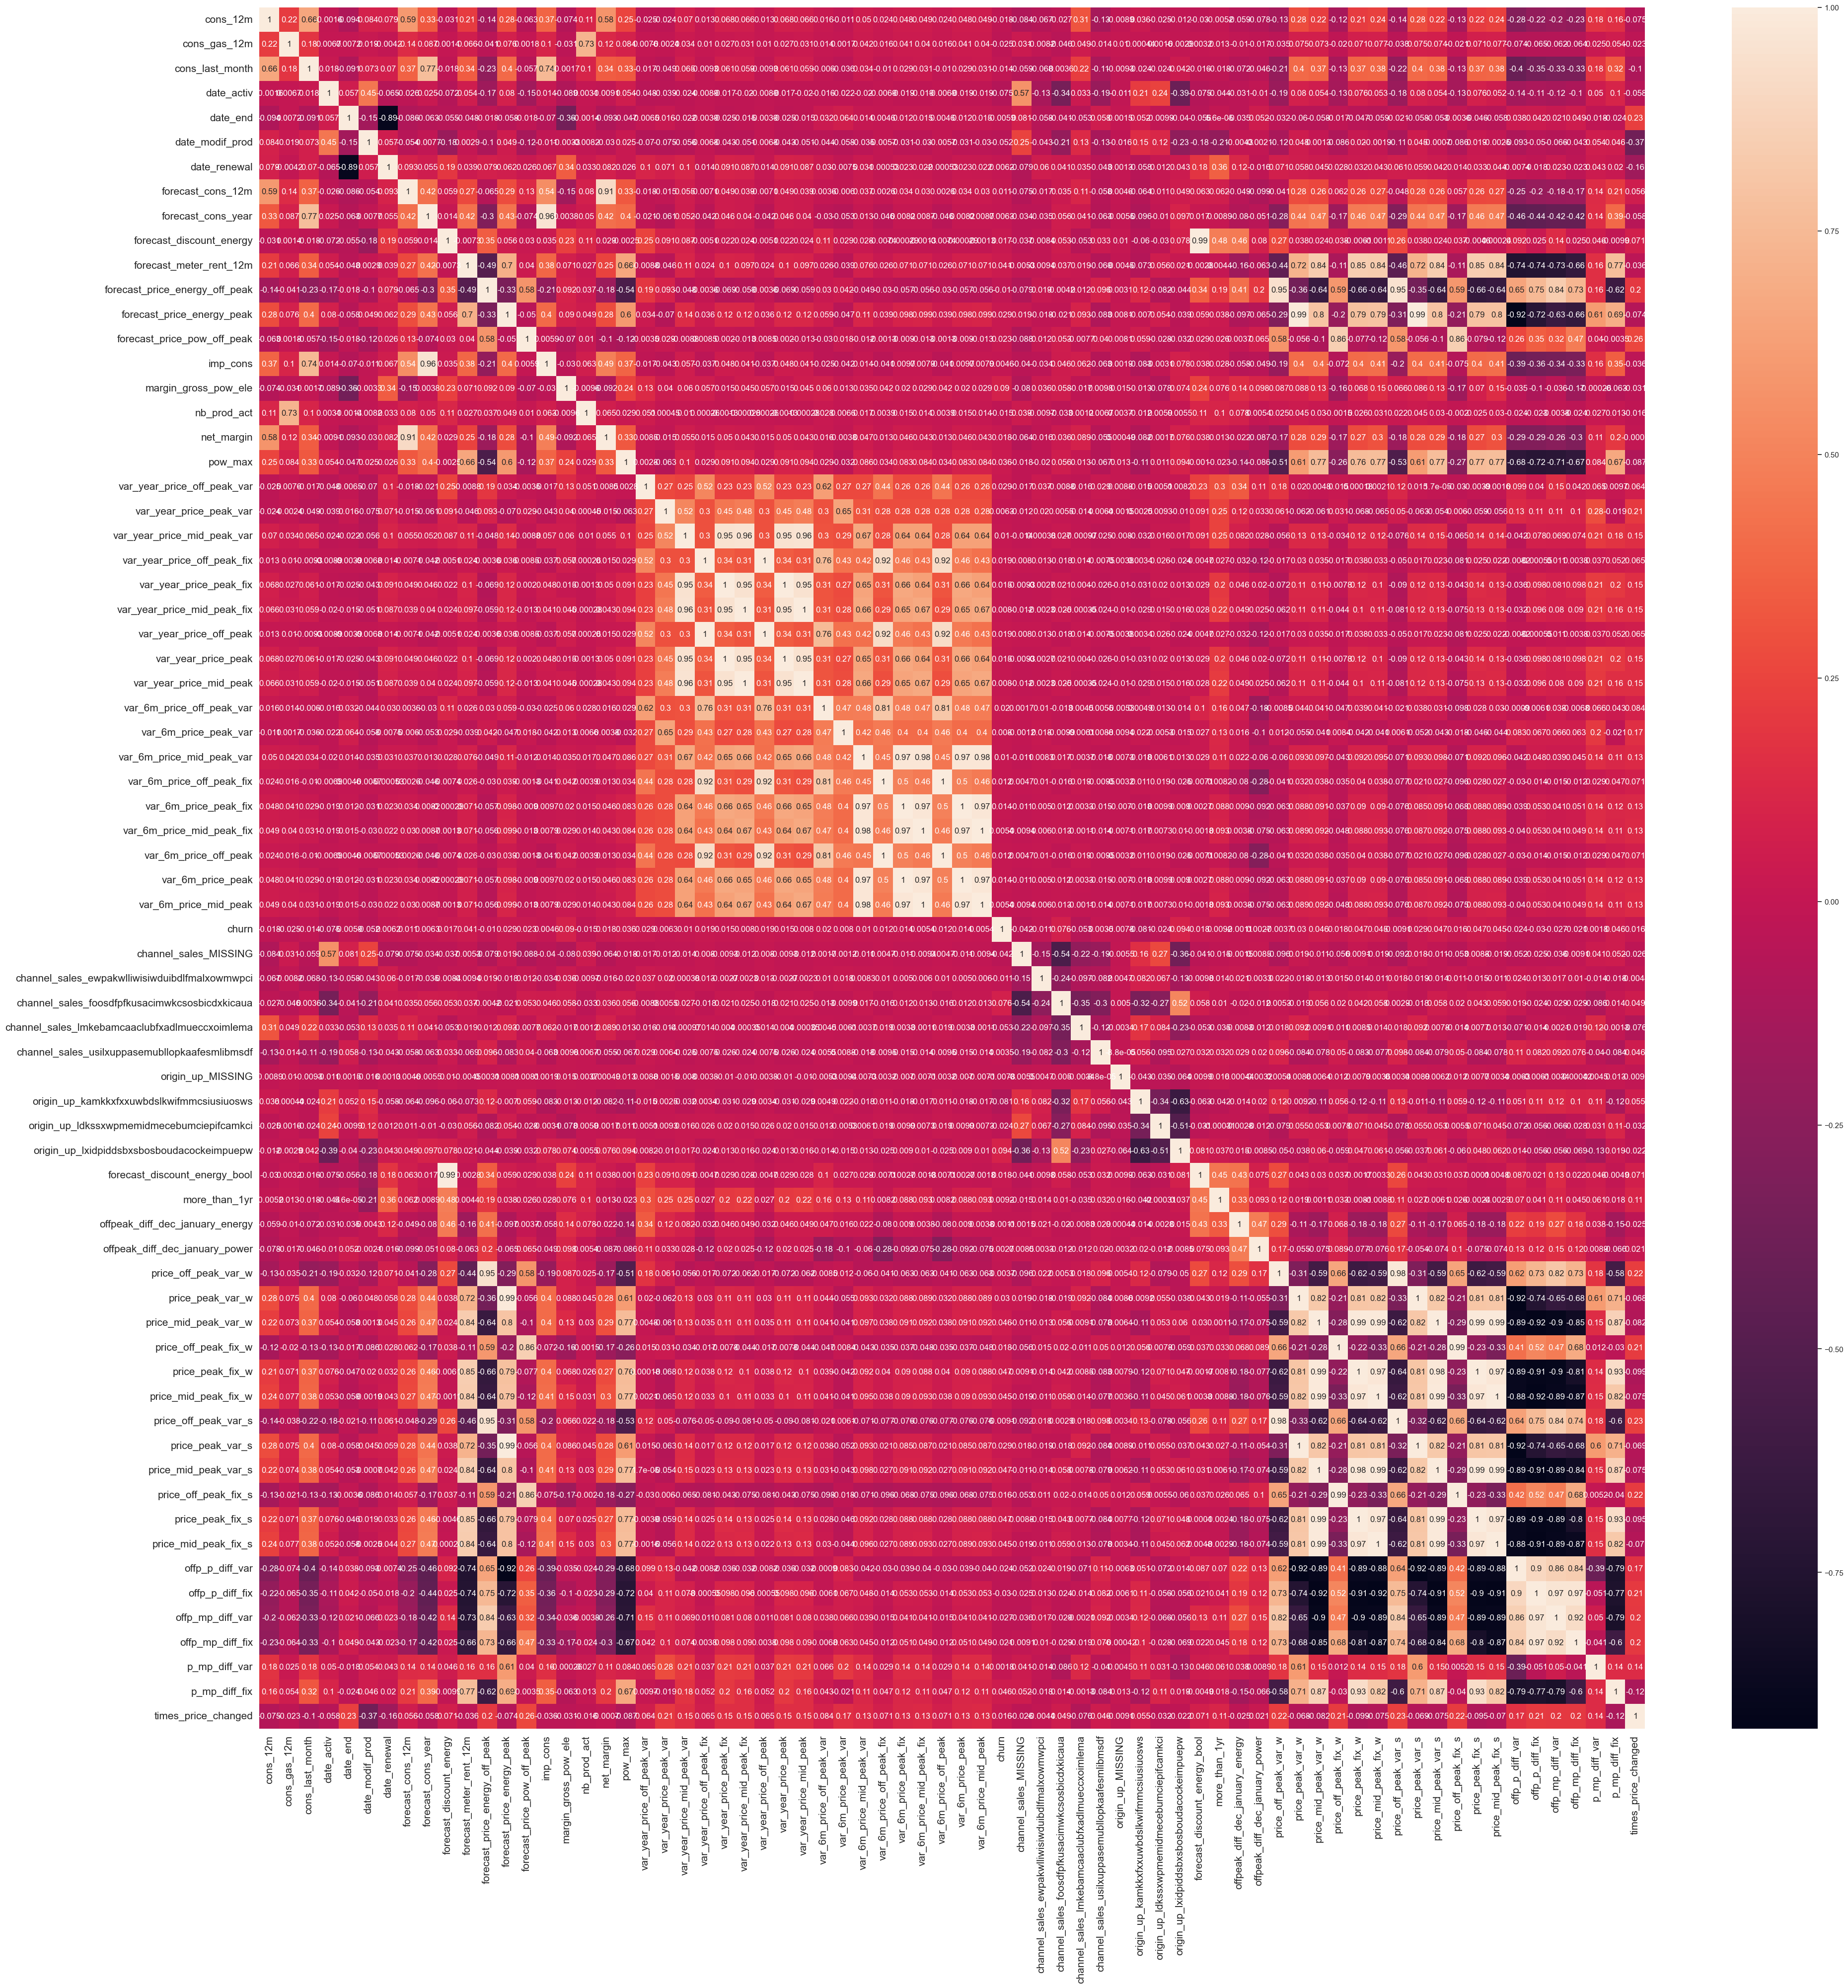

In [63]:
# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [73]:
del price_df

---
## 4. Sampling and Model traning 

In [90]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, f1_score, classification_report, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE



Since the dataset has an huge imbalance between the class of chunred vs retained (10/90), which is going to make the model not sensitivy to the minority class ***the churned class*** , meaning  the model has a low recall compared to precision 

**solution**: we would have to use one or many of the technique of addresing imbalance :
- model-level technique of adding weight to the miniority class to have the model be more sensitive to the minority class or 
- use a data preprocessing technique of undersamplingoversampling to have more balanced classes or oversampling with SMOTE 

### 4.0. Normal RFC 

In [79]:
train_df = df.copy()
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f'train_features: {X_train.shape}', f'test_features: {X_test.shape}')
print(f'train_labels: {y_train.shape}', f'test_labels: {y_test.shape}')

(14606, 70)
(14606,)
train_features: (10954, 70) test_features: (3652, 70)
train_labels: (10954,) test_labels: (3652,)


In [80]:
rfc = RandomForestClassifier(n_estimators=1000, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [87]:
predictions_rfc = rfc.predict(X_test)

# Calculate precision, recall, and f1 score
precision_og = precision_score(y_test, predictions_rfc)
recall_og = recall_score(y_test, predictions_rfc)
f1_og = f1_score(y_test, predictions_rfc)

print(f"Precision: {precision_og:.2f}")
print(f"Recall: {recall_og:.2f}")
print(f"F1 Score: {f1_og:.2f}")

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, predictions_rfc))


Precision: 0.86
Recall: 0.05
F1 Score: 0.09

Classification Report:

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.86      0.05      0.09       366

    accuracy                           0.90      3652
   macro avg       0.88      0.52      0.52      3652
weighted avg       0.90      0.90      0.86      3652



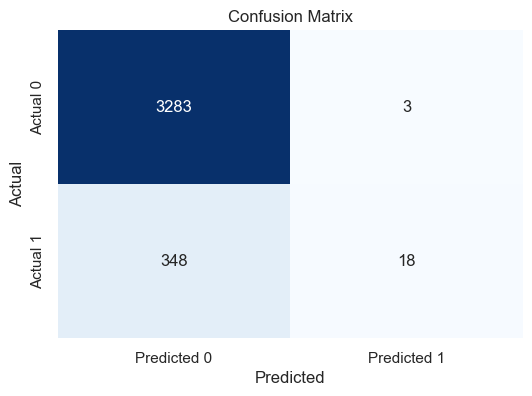

In [82]:
cm_rfc = confusion_matrix(y_test,predictions_rfc)

plt.figure(figsize=(6,4))
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

High false neg error (predict 0 actual 1), low true neg (predict 1 actual 1)

High false neg (FN): a high number of false negatives, which means many churners are being missed. This is problematic if the goal is to correctly identify as many churners as possible.
false neg are more costly: Missing out on identifying churners can lead to direct revenue loss, whereas some false positives might just result in unnecessary but less costly actions.

Low Recall: This indicates that the model is not capturing a sufficient number of actual churners.

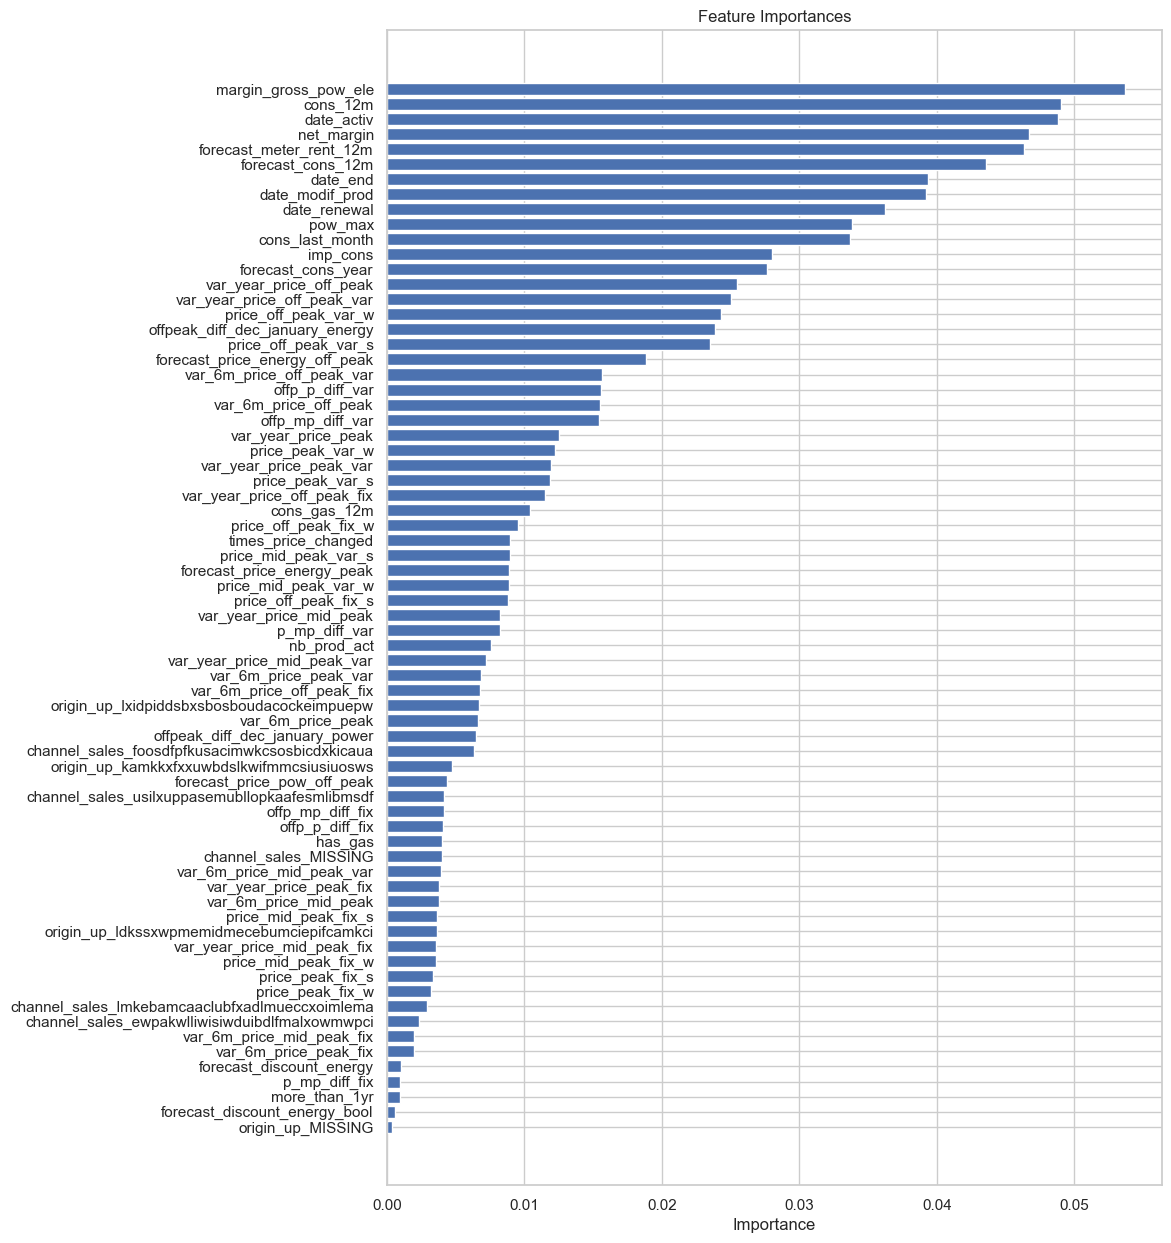

In [83]:
feature_importances = pd.DataFrame({ 'features': X_train.columns, 'importance': model_rfc.feature_importances_}).sort_values(by='importance', ascending=True).reset_index()
plt.figure(figsize=(10, 15))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

**as predicted the model is preforming badly with picking up the minority class (churned class), the following step is to test different technique of addresing imbalance in oder to see with technique is most suitable for this dataset**
to answer the question is price driving churn, we would need a better model to predict churn in order to see the features driving churn and whether or not those actually include price fluctuation/price-sensitivity

### 4.1. Technique Implementations


To compare different techniques effectively, it is crucial to use a systematic approach. Below are the test and evaluation of the four techniques ive choosen: 
1. traditional Random Forest Classifier (RFC) without threshold tuning,  
2. RFC with threshold tuning, 
3. RFC using SMOTE with threshold tuning, and 
4. RFC using Undersampling Ensemble with threshold tuning.



In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    precision_recall_curve
)

from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

a. baseline (RFC without threshold tuning )

Metrics:
       
       Precision: 0.86
       Recall: 0.05
       F1 Score: 0.09

Classification Report:

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.86      0.05      0.09       366

    accuracy                           0.90      3652
    macro avg       0.88      0.52      0.52      3652
    weighted avg       0.90      0.90      0.86      3652


In [85]:
from sklearn.metrics import fbeta_score

# Assuming y_test is your actual labels and y_pred are your predicted labels

# Calculate different F-scores
f1 = f1_score(y_test, predictions_rfc)
f1_5 = fbeta_score(y_test, predictions_rfc, beta=1.5)
f2 = fbeta_score(y_test, predictions_rfc, beta=2)
f3 = fbeta_score(y_test, predictions_rfc, beta=3)

print(f"F1 Score: {f1:.2f}")
print(f"F1.5 Score: {f1_5:.2f}")
print(f"F2 Score: {f2:.2f}")
print(f"F3 Score: {f3:.2f}")


F1 Score: 0.09
F1.5 Score: 0.07
F2 Score: 0.06
F3 Score: 0.05


b. RFC with threshold tuning 

In [86]:
y_scores_rfc = rfc.predict_proba(X_test)[:, 1]

precision_rfc_thres, recall_rfc_thres, thresholds_rfc = precision_recall_curve(y_test, y_scores_rfc)

# Calculate F1.5 scores for each threshold
epsilon = 1e-10  # Small constant to avoid division by zero
precision_rfc_thres_safe = precision_rfc_thres + epsilon
recall_rfc_thres_safe = recall_rfc_thres + epsilon
# Calculate different F-scores

f1_5_scores_rfc = ((1 + 1.15**2) / ((1.15**2 / recall_rfc_thres_safe) + (1 / precision_rfc_thres_safe)))

# Get the index of the highest F1.5 score
best_idx_rfc = np.argmax(f1_5_scores_rfc)
best_threshold_rfc = thresholds_rfc[best_idx_rfc]

# Make predictions with the best threshold
y_pred_rfc_best = (y_scores_rfc >= best_threshold_rfc).astype(int)

# Calculate metrics
precision_rfc_best = precision_score(y_test, y_pred_rfc_best)
recall_rfc_best = recall_score(y_test, y_pred_rfc_best)
f1_rfc_best = f1_score(y_test, y_pred_rfc_best)

print(f"Traditional RFC with Threshold Tuning - Precision: {precision_rfc_best:.2f}, Recall: {recall_rfc_best:.2f}, F1 Score: {f1_rfc_best:.2f}")
print("\nClassification Report (Best Threshold):\n")
print(classification_report(y_test, y_pred_rfc_best))


Traditional RFC with Threshold Tuning - Precision: 0.26, Recall: 0.33, F1 Score: 0.29

Classification Report (Best Threshold):

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      3286
           1       0.26      0.33      0.29       366

    accuracy                           0.84      3652
   macro avg       0.59      0.61      0.60      3652
weighted avg       0.86      0.84      0.85      3652



In [88]:

# Calculate different F-scores
f1 = f1_score(y_test, y_pred_rfc_best)
f1_5 = fbeta_score(y_test, y_pred_rfc_best, beta=1.5)
f2 = fbeta_score(y_test, y_pred_rfc_best, beta=2)
f3 = fbeta_score(y_test, y_pred_rfc_best, beta=3)

print(f"F1 Score: {f1:.2f}")
print(f"F1.5 Score: {f1_5:.2f}")
print(f"F2 Score: {f2:.2f}")
print(f"F3 Score: {f3:.2f}")

F1 Score: 0.29
F1.5 Score: 0.31
F2 Score: 0.31
F3 Score: 0.32


c. SMOTE with Threshold Tuning


In [91]:
# Create a pipeline with SMOTE and Random Forest
pipeline_smote = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=1000, random_state=42))
])

# Fit the pipeline
pipeline_smote.fit(X_train, y_train)

# Get prediction probabilities for the test set
y_scores_smote = pipeline_smote.predict_proba(X_test)[:, 1]

# Calculate precision and recall for different thresholds
precision_smote_thres, recall_smote_thres, thresholds_smote = precision_recall_curve(y_test, y_scores_smote)

# Calculate F1.5 scores for each threshold
f1_5_scores_smote = ((1 + 1.15**2) / ((1.15**2 / (recall_smote_thres + epsilon)) + (1 / (precision_smote_thres + epsilon))))

# Get the index of the highest F1.5 score
best_idx_smote = np.argmax(f1_5_scores_smote)
best_threshold_smote = thresholds_smote[best_idx_smote]

# Make predictions with the best threshold
y_pred_smote_best = (y_scores_smote >= best_threshold_smote).astype(int)

# Calculate metrics
precision_smote_best = precision_score(y_test, y_pred_smote_best)
recall_smote_best = recall_score(y_test, y_pred_smote_best)
f1_smote_best = f1_score(y_test, y_pred_smote_best)

print(f"SMOTE with Threshold Tuning - Precision: {precision_smote_best:.2f}, Recall: {recall_smote_best:.2f}, F1 Score: {f1_smote_best:.2f}")
print("\nClassification Report (Best Threshold):\n")
print(classification_report(y_test, y_pred_smote_best))


SMOTE with Threshold Tuning - Precision: 0.23, Recall: 0.31, F1 Score: 0.27

Classification Report (Best Threshold):

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      3286
           1       0.23      0.31      0.27       366

    accuracy                           0.83      3652
   macro avg       0.58      0.60      0.59      3652
weighted avg       0.85      0.83      0.84      3652



In [92]:

# Calculate different F-scores
f1 = f1_score(y_test, y_pred_smote_best)
f1_5 = fbeta_score(y_test, y_pred_smote_best, beta=1.5)
f2 = fbeta_score(y_test, y_pred_smote_best, beta=2)
f3 = fbeta_score(y_test, y_pred_smote_best, beta=3)

print(f"F1 Score: {f1:.2f}")
print(f"F1.5 Score: {f1_5:.2f}")
print(f"F2 Score: {f2:.2f}")
print(f"F3 Score: {f3:.2f}")

F1 Score: 0.27
F1.5 Score: 0.28
F2 Score: 0.29
F3 Score: 0.30


d. Random Undersampling Ensemble with Threshold Tuning


In [124]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, classification_report
from sklearn.base import clone
import numpy as np

# Manual implementation of the pipeline steps
def fit_ensemble(X, y, base_estimator, n_estimators, random_state=None):
    X_majority = X[y == 0]
    y_majority = y[y == 0]
    X_minority = X[y == 1]
    y_minority = y[y == 1]

    models = []
    for i in range(n_estimators):
        # Randomly undersample the majority class
        X_undersampled, y_undersampled = resample(X_majority, y_majority, n_samples=len(y_minority), random_state=i)
        X_combined = np.vstack([X_undersampled, X_minority])
        y_combined = np.concatenate([y_undersampled, y_minority])
        
        # Train the model
        model = clone(base_estimator)
        model.set_params(random_state=(random_state + i) if random_state is not None else None)
        model.fit(X_combined, y_combined)
        models.append(model)
    return models

def predict_ensemble(models, X):
    predictions = np.array([model.predict_proba(X)[:, 1] for model in models])
    mean_probabilities = np.mean(predictions, axis=0)
    return mean_probabilities

# Define the base estimator and the ensemble
base_estimator = RandomForestClassifier(n_estimators=1000, random_state=42)
n_estimators = 10
models = fit_ensemble(X_train, y_train, base_estimator, n_estimators, random_state=42)

# Get predictions and probabilities
y_pred_us_proba = predict_ensemble(models, X_test)

# Precision-Recall curve
precision_us, recall_us, thresholds_us = precision_recall_curve(y_test, y_pred_us_proba)

# F1 score calculation
f1_5_scores_us = ((1 + 1.15**2) / ((1.15**2 / (recall_us + epsilon)) + (1 / (precision_us + epsilon))))

best_idx_us = np.argmax(f1_5_scores_us)
best_threshold_us = thresholds_us[best_idx_us]

print(f"Best Threshold: {best_threshold_us:.4f}")
print(f"Best F1 Score: {f1_5_scores_us[best_idx_us]:.4f}")

# Apply the best threshold
y_pred_us_best = (y_pred_us_proba >= best_threshold_us).astype(int)

# Evaluation metrics
print(f"Precision (Best Threshold): {precision_score(y_test, y_pred_us_best):.2f}")
print(f"Recall (Best Threshold): {recall_score(y_test, y_pred_us_best):.2f}")
print(f"F1 Score (Best Threshold): {f1_score(y_test, y_pred_us_best):.2f}")

print("\nClassification Report (Best Threshold):\n")
print(classification_report(y_test, y_pred_us_best))


/Users/hoangtran/miniconda3/envs/localenv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/hoangtran/miniconda3/envs/localenv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/hoangtran/miniconda3/envs/localenv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/hoangtran/miniconda3/envs/localenv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/hoangtran/miniconda3/envs/localenv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  

Best Threshold: 0.5468
Best F1 Score: 0.2871
Precision (Best Threshold): 0.18
Recall (Best Threshold): 0.51
F1 Score (Best Threshold): 0.27

Classification Report (Best Threshold):

              precision    recall  f1-score   support

           0       0.93      0.74      0.83      3286
           1       0.18      0.51      0.27       366

    accuracy                           0.72      3652
   macro avg       0.56      0.63      0.55      3652
weighted avg       0.86      0.72      0.77      3652



In [129]:

# Calculate different F-scores
f1 = f1_score(y_test, y_pred_us_best)
f1_5 = fbeta_score(y_test, y_pred_us_best, beta=1.5)
f2 = fbeta_score(y_test, y_pred_us_best, beta=2)
f3 = fbeta_score(y_test, y_pred_us_best, beta=3)

print(f"F1 Score: {f1:.2f}")
print(f"F1.5 Score: {f1_5:.2f}")
print(f"F2 Score: {f2:.2f}")
print(f"F3 Score: {f3:.2f}")

F1 Score: 0.27
F1.5 Score: 0.33
F2 Score: 0.38
F3 Score: 0.43


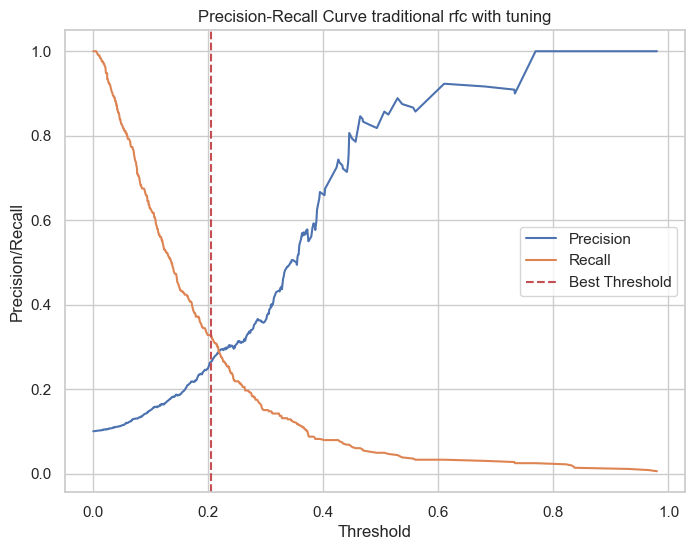

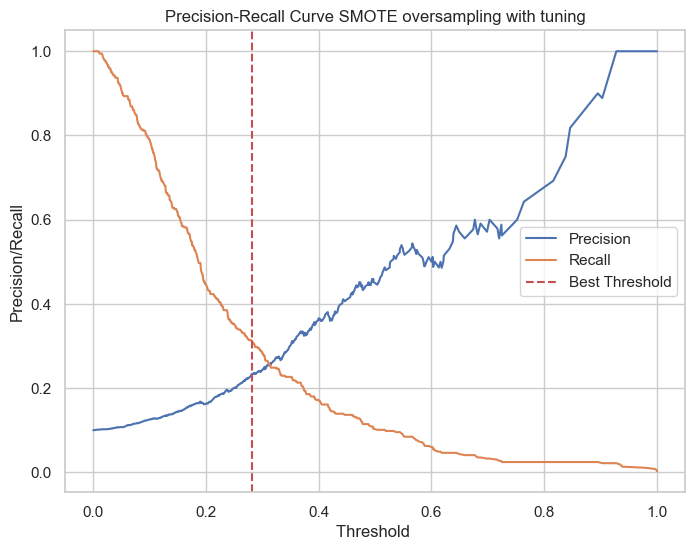

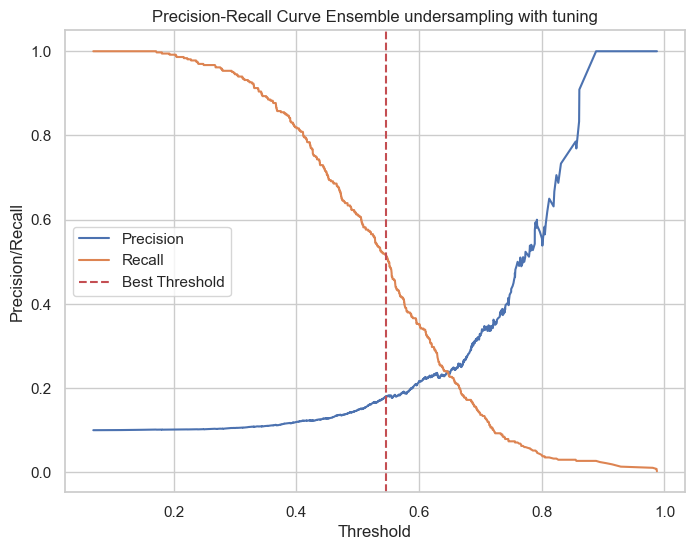

In [127]:

# Plot the precision-recall curve with the optimal threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds_rfc, precision_rfc_thres[:-1], label="Precision")
plt.plot(thresholds_rfc, recall_rfc_thres[:-1], label="Recall")
plt.axvline(x=best_threshold_rfc, color='r', linestyle='--', label="Best Threshold")
plt.xlabel("Threshold")
plt.ylabel("Precision/Recall")
plt.title("Precision-Recall Curve traditional rfc with tuning")
plt.legend()
plt.show()
# Plot the precision-recall curve with the optimal threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds_smote, precision_smote_thres[:-1], label="Precision")
plt.plot(thresholds_smote, recall_smote_thres[:-1], label="Recall")
plt.axvline(x=best_threshold_smote, color='r', linestyle='--', label="Best Threshold")
plt.xlabel("Threshold ")
plt.ylabel("Precision/Recall")
plt.title("Precision-Recall Curve SMOTE oversampling with tuning")
plt.legend()
plt.show()
# Plot the precision-recall curve with the optimal threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds_us, precision_us[:-1], label="Precision")
plt.plot(thresholds_us, recall_us[:-1], label="Recall")
plt.axvline(x=best_threshold_us, color='r', linestyle='--', label="Best Threshold")
plt.xlabel("Threshold")
plt.ylabel("Precision/Recall")
plt.title("Precision-Recall Curve Ensemble undersampling with tuning")
plt.legend()
plt.show()

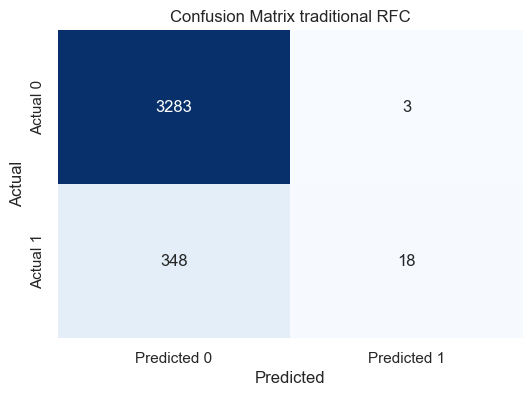

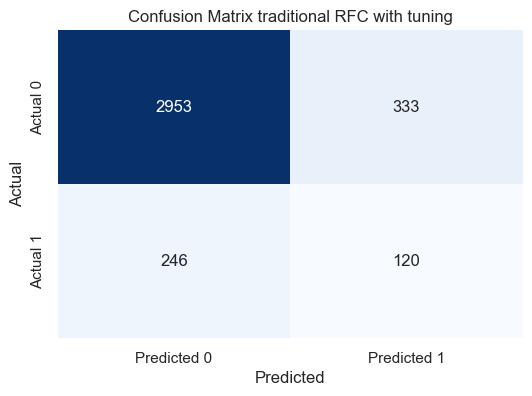

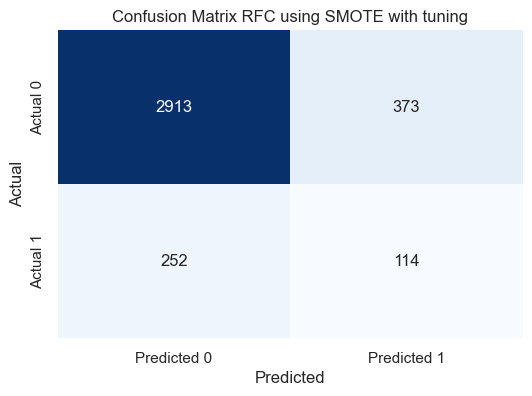

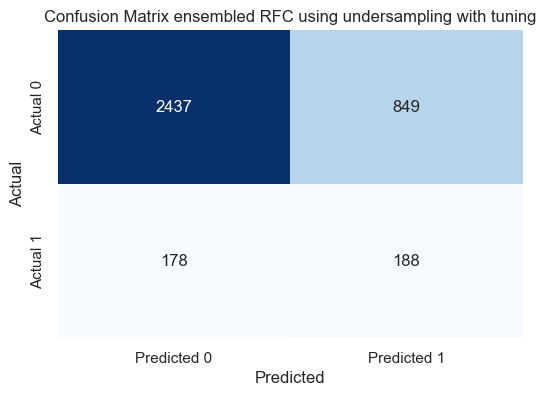

In [128]:
cm_rfc
cm_rfc_tune = confusion_matrix(y_test, y_pred_rfc_best)
cm_smote_tune = confusion_matrix(y_test, y_pred_smote_best)
cm_us_tune = confusion_matrix(y_test, y_pred_us_best)

plt.figure(figsize=(6,4))
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix traditional RFC')
plt.show()
plt.figure(figsize=(6,4))
sns.heatmap(cm_rfc_tune, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix traditional RFC with tuning')
plt.show()
plt.figure(figsize=(6,4))
sns.heatmap(cm_smote_tune, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix RFC using SMOTE with tuning')
plt.show()
plt.figure(figsize=(6,4))
sns.heatmap(cm_us_tune, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix ensembled RFC using undersampling with tuning')
plt.show()

___

## ***Inferences:***
### 1. Performance Comparison:

The traditional RFC with threshold tuning performs better than SMOTE in terms of precision, recall, and all F-scores.

The ensemble undersampling method still has the highest recall but at the cost of precision.


### 2. Effectiveness of Sampling Techniques:

In this case, the sampling techniques (SMOTE and undersampling) don't seem to improve overall performance compared to the traditional RFC with threshold tuning.

This suggests that the class imbalance might not be the primary challenge in this dataset, or that the threshold tuning is effectively addressing the imbalance issue.


### 3. Trade-offs:

Traditional RFC offers the best balance between precision and recall.

Ensemble undersampling significantly boosts recall but at a substantial cost to precision.

SMOTE doesn't seem to offer advantages over the traditional approach in this case.


### 4. Model Choice:

If a balanced approach is needed, the traditional RFC with threshold tuning appears to be the best choice.

If identifying as many potential churners as possible is the priority (even at the cost of more false positives), the ensemble undersampling method would be preferable.


### 5. Implications for Feature Engineering and Model Selection:

The fact that the traditional RFC performs well suggests that the features themselves might be quite informative.
Hence, to answer the secondary question of this analysis:

    5.1. Does price-sensitivity drive churn ?
    
    - Since the feature importance itself would not change due to threshold tuning, the answer is no, the price is not a reliably strong
     predictor of churn based on the feature importances graph of the 1st RFC model 

The threshold tuning seems to be doing a good job of addressing the class imbalance without need for sampling techniques.


### 6. Further Considerations:

It might be worth investigating why SMOTE isn't improving performance. This could involve analyzing the synthetic samples it's creating.

The strong performance of the traditional RFC suggests that further feature engineering or selection might be more beneficial than focusing on sampling techniques.

In [131]:
# Get probability predictions
proba_predictions = rfc.predict_proba(X_test)

# Use the best threshold from your tuning process
y_pred_rfc_best = (proba_predictions[:, 1] >= best_threshold_rfc).astype(int)

# Reset index of X_test
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

# Add predictions and probabilities to X_test
X_test['churn'] = y_pred_rfc_best
X_test['churn_probability'] = proba_predictions[:, 1]

# Save to CSV
X_test.to_csv('out_of_sample_data_with_predictions.csv', index=False)

# If you need probabilities separately
probabilities = proba_predictions[:, 1]